In [10]:
print("GROUP 1: K-MEANS CLUSTERING")

GROUP 1: K-MEANS CLUSTERING


In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode

In [12]:
df = pd.read_csv('iris.csv')
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df = df.dropna()
df.info()

#establishing which 2 features to use
feature1 = "PetalLengthCm"
feature2 = "PetalWidthCm"

# in case 3 features will be tested
# feature3 = "w_l_ratio"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


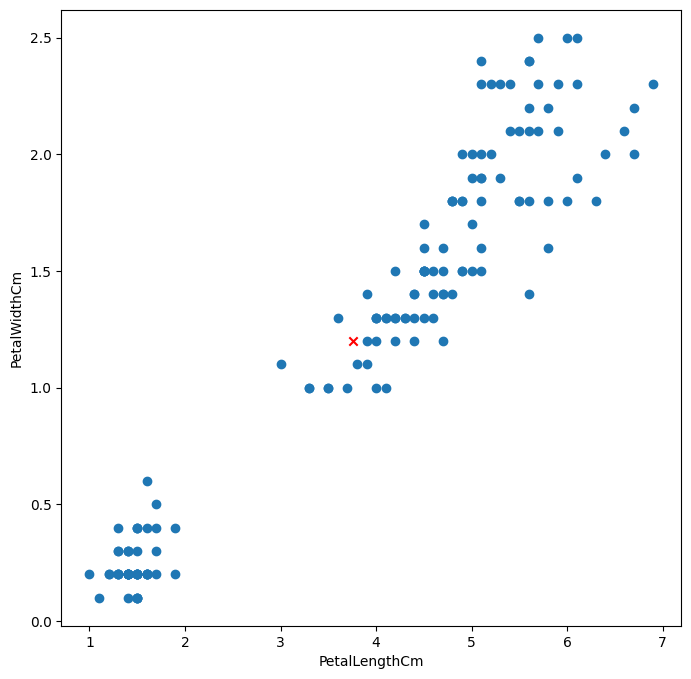

In [15]:
adjusted_df = df[[feature1, feature2]]

#plotting what the current dataset looks like
centroid = [adjusted_df[feature1].mean(), adjusted_df[feature2].mean()]
# Convert species names to numeric labels
species_mapping = {species: i for i, species in enumerate(df['Species'].unique())}
true_labels = df['Species'].map(species_mapping).values  # Store true labels as numbers

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(adjusted_df[feature1], adjusted_df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [16]:
# distance function
def calculate_euclidean_distance(p1, p2):
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

In [17]:
# assigns each data point to its respective cluster based on its distance to a centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    labels = []
    for point in data:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
        labels.append(cluster_index)  # Store predicted label
    return clusters, labels

In [18]:
def compute_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            new_centroids.append(new_centroid)
    return new_centroids

In [19]:
def compute_wcss(clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += calculate_euclidean_distance(point, centroids[i]) ** 2
    return wcss

In [20]:
def plot_clusters(data, centroids, clusters, iteration, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(7, 7))
    for i, cluster in enumerate(clusters):
        cluster_points = list(zip(*cluster))
        if cluster_points:
            plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    centroid_points = list(zip(*centroids))
    plt.scatter(centroid_points[0], centroid_points[1], c='k', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration {iteration}, {k} Cluster/s')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

In [21]:
def k_means(data, k, max_iters=100):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for i in range(max_iters):
        clusters, labels = assign_clusters(data, centroids) # determines clusters
        plot_clusters(data, centroids, clusters, i+1, k)  # Plot each iteration

        wcss = compute_wcss(clusters, centroids)
        print(f"Iteration {i+1}, {k} Cluster/s. WCSS: {wcss}")

        new_centroids = compute_centroids(clusters) # assigns new centroids
        if new_centroids == centroids:
            return centroids, clusters, labels
        centroids = new_centroids
    return centroids, clusters, labels

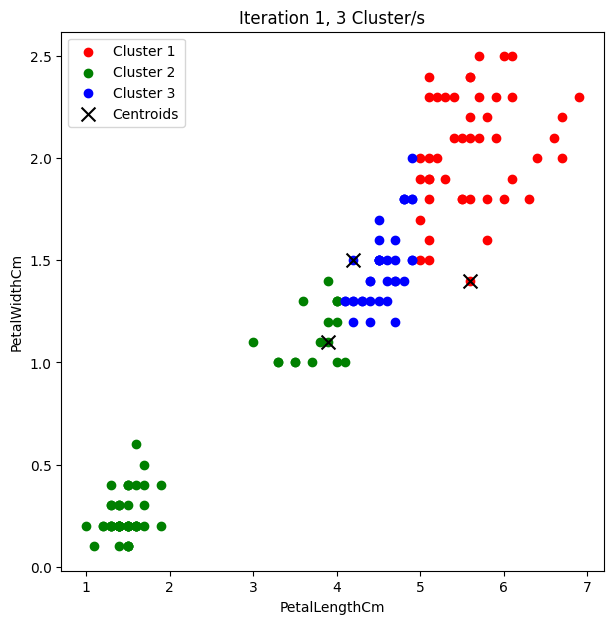

Iteration 1, 3 Cluster/s. WCSS: 379.80999999999983


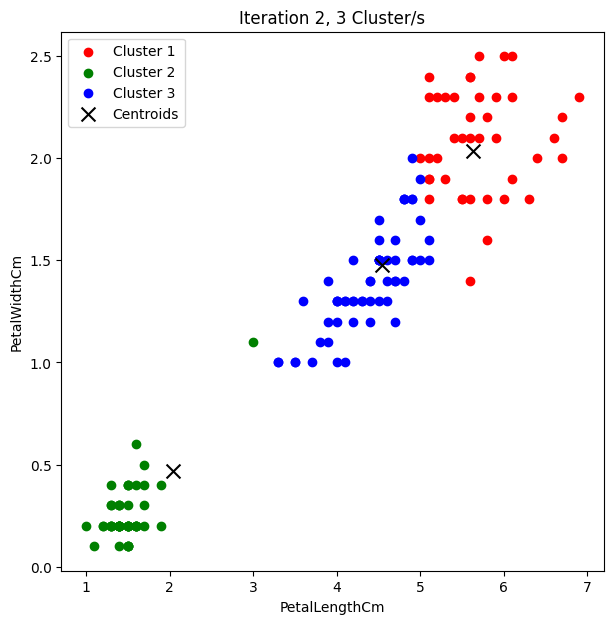

Iteration 2, 3 Cluster/s. WCSS: 52.76491707654342


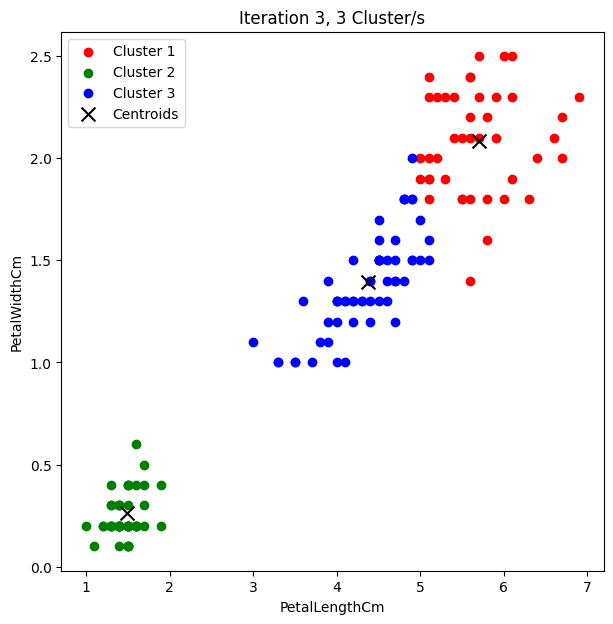

Iteration 3, 3 Cluster/s. WCSS: 31.89841930447745


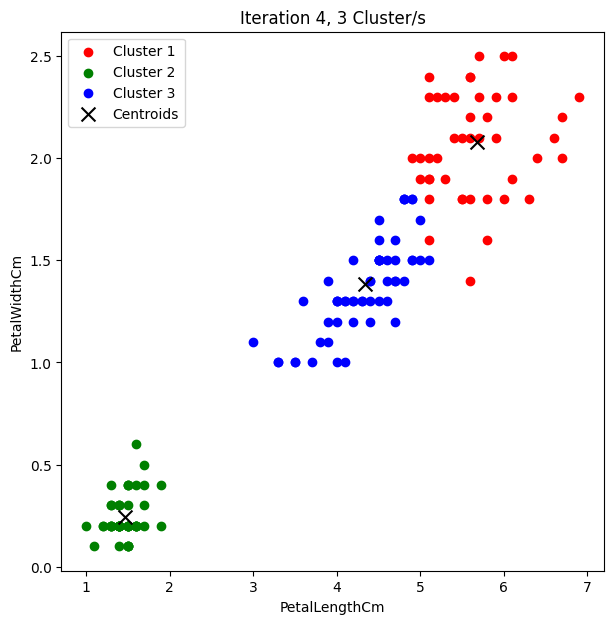

Iteration 4, 3 Cluster/s. WCSS: 31.62704571115804


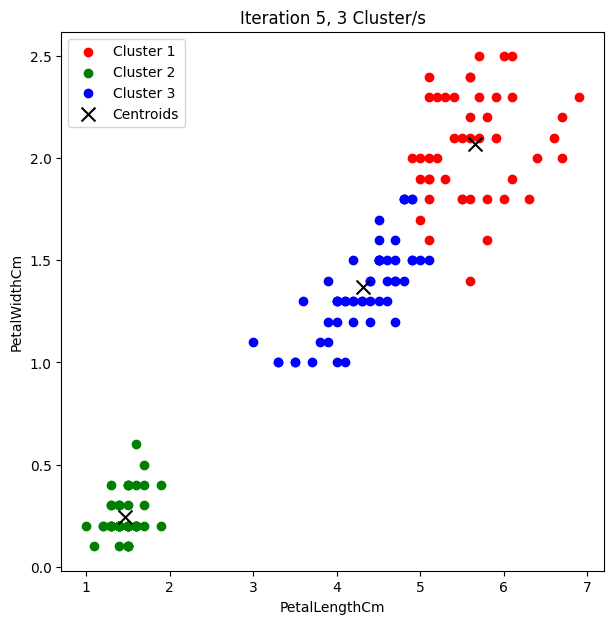

Iteration 5, 3 Cluster/s. WCSS: 31.521975829608714


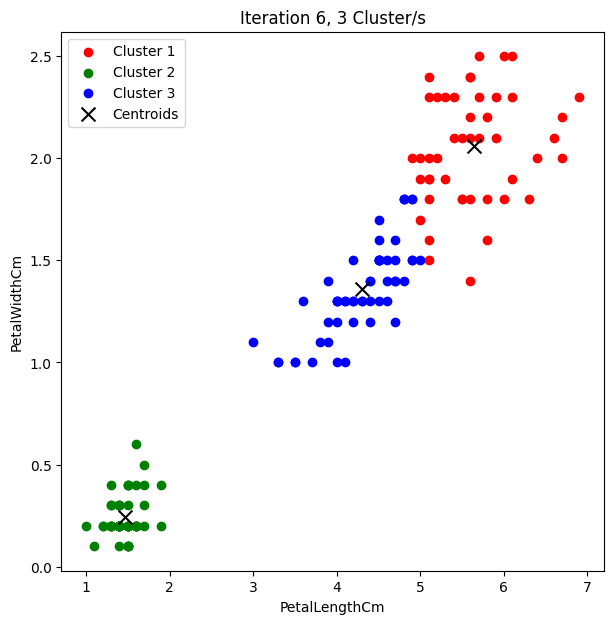

Iteration 6, 3 Cluster/s. WCSS: 31.45438106315683


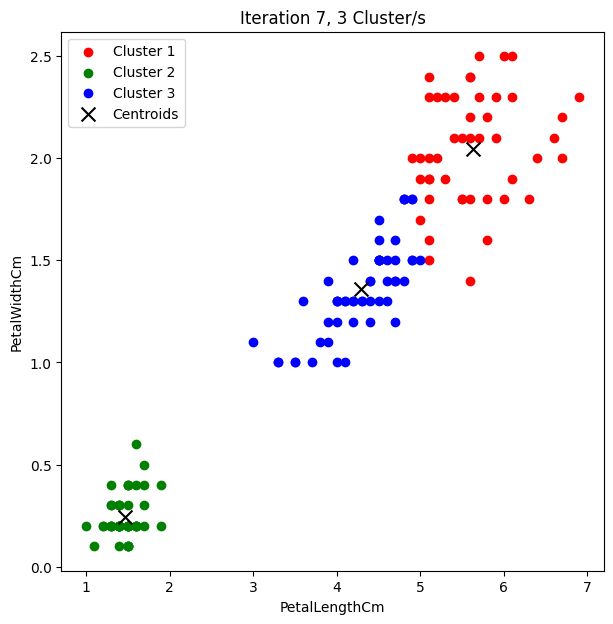

Iteration 7, 3 Cluster/s. WCSS: 31.42928566827698


In [22]:
# Run k-means for k=3 (since the dataset has 3 species)
k = 3
centroids, clusters, predicted_labels = k_means(adjusted_df.values.tolist(), k)

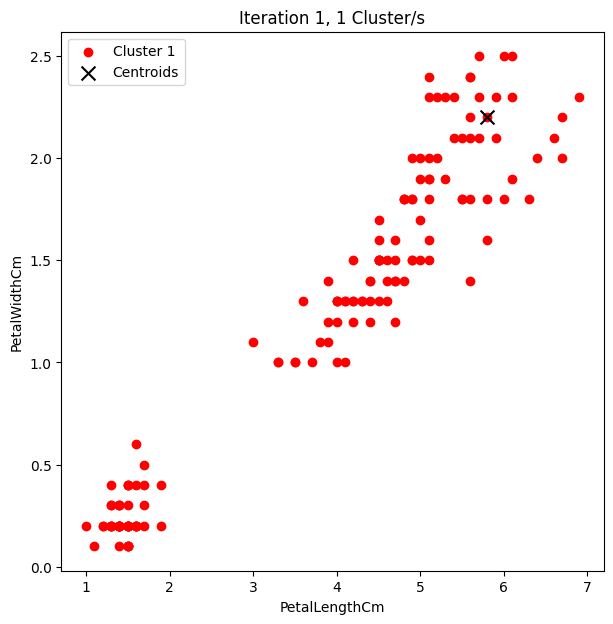

Iteration 1, 1 Cluster/s. WCSS: 1326.1


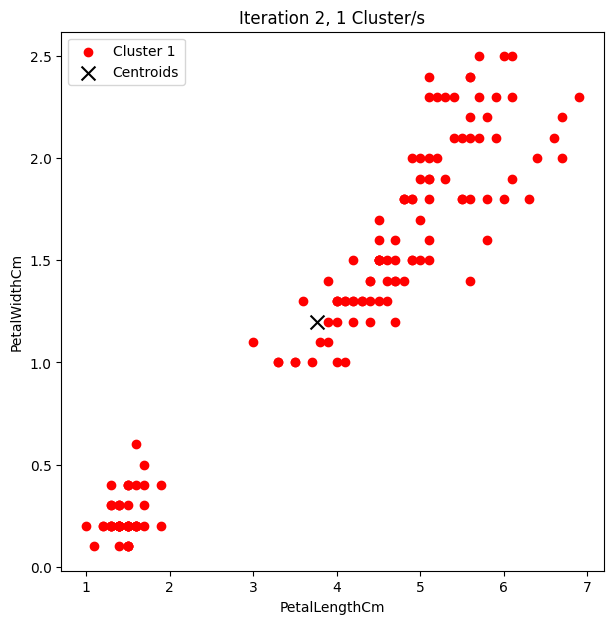

Iteration 2, 1 Cluster/s. WCSS: 550.6434666666671


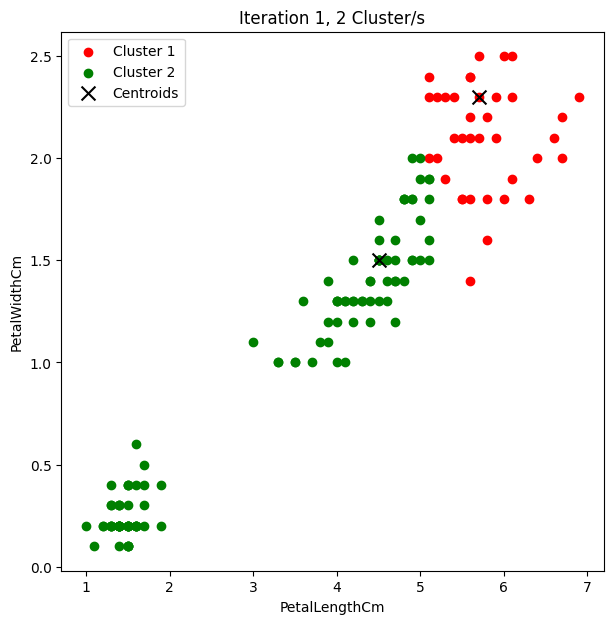

Iteration 1, 2 Cluster/s. WCSS: 575.2599999999995


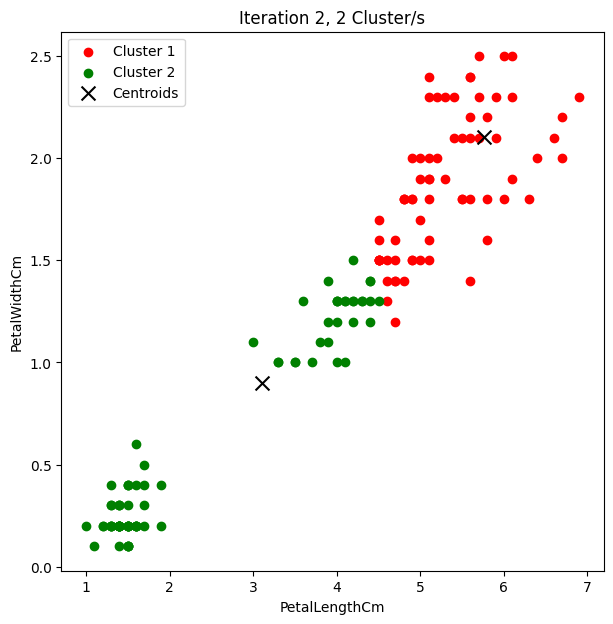

Iteration 2, 2 Cluster/s. WCSS: 240.9437143588886


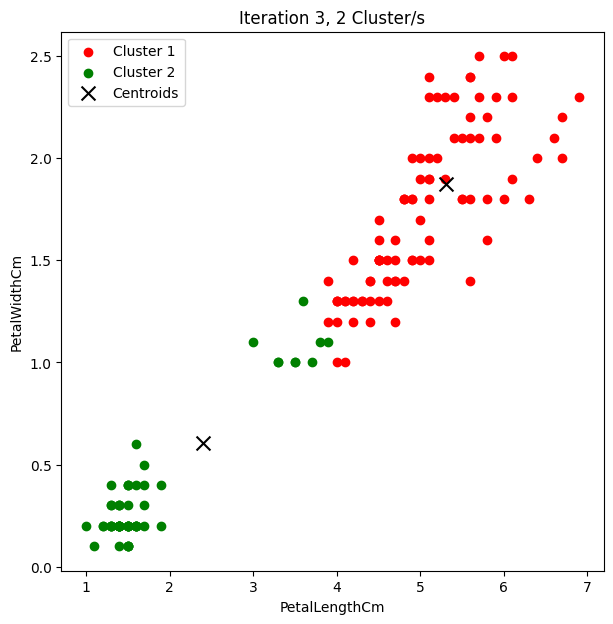

Iteration 3, 2 Cluster/s. WCSS: 136.21993660714287


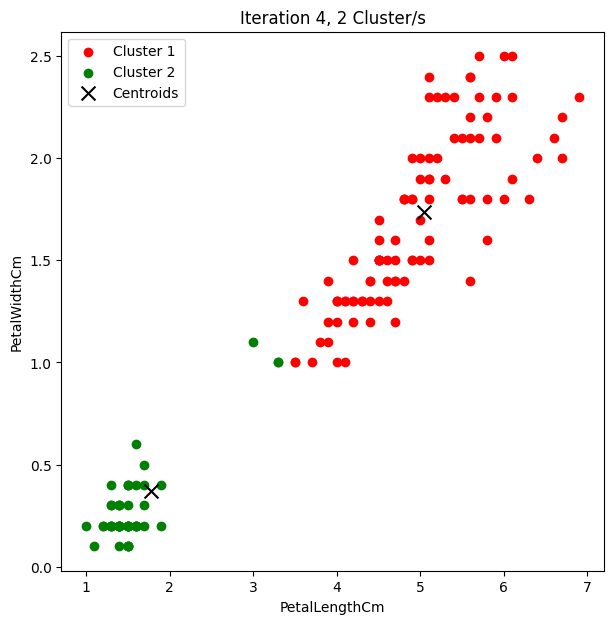

Iteration 4, 2 Cluster/s. WCSS: 91.02684355020423


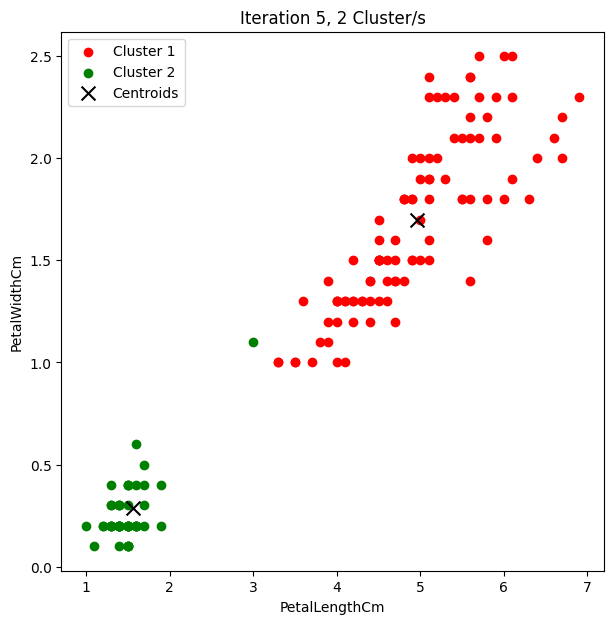

Iteration 5, 2 Cluster/s. WCSS: 86.81120796268446


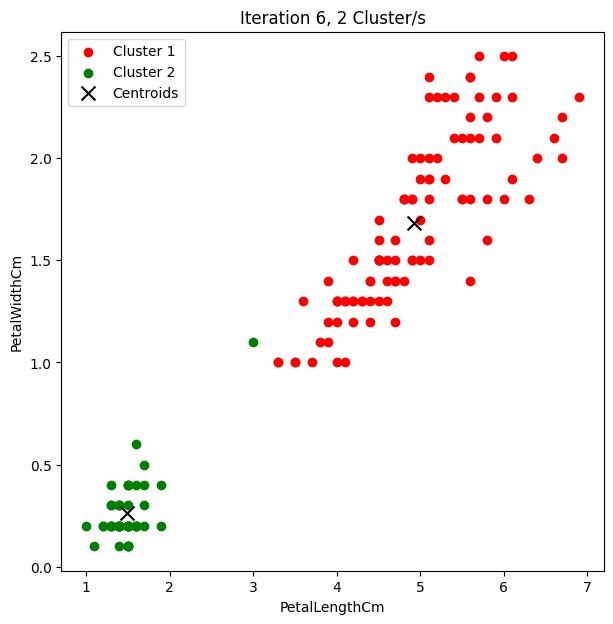

Iteration 6, 2 Cluster/s. WCSS: 86.40394533571


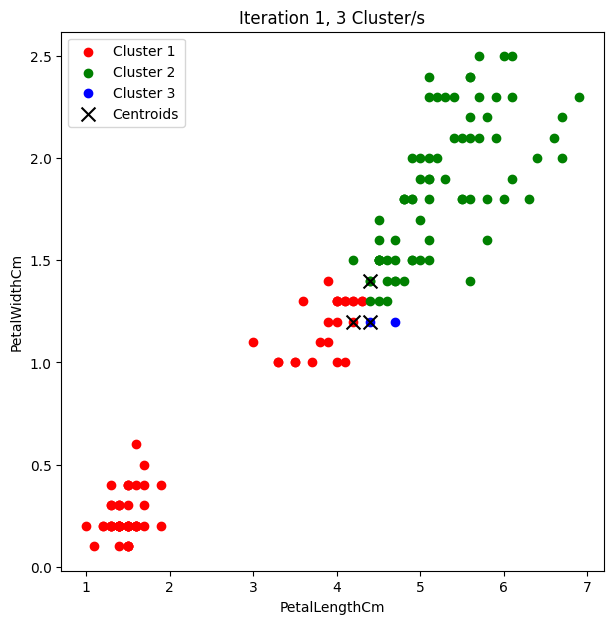

Iteration 1, 3 Cluster/s. WCSS: 535.2200000000003


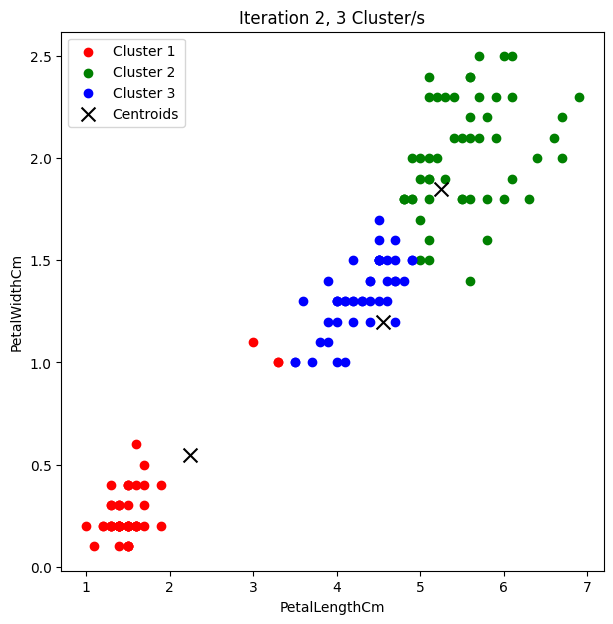

Iteration 2, 3 Cluster/s. WCSS: 76.13007121986854


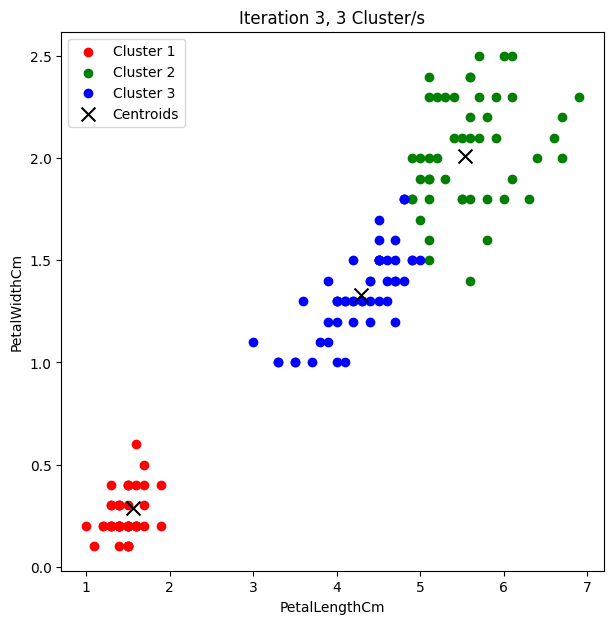

Iteration 3, 3 Cluster/s. WCSS: 32.185550982972444


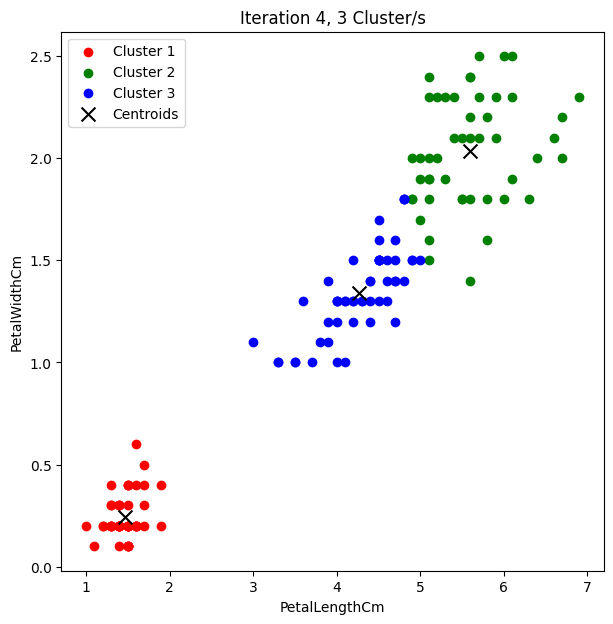

Iteration 4, 3 Cluster/s. WCSS: 31.387758974358974


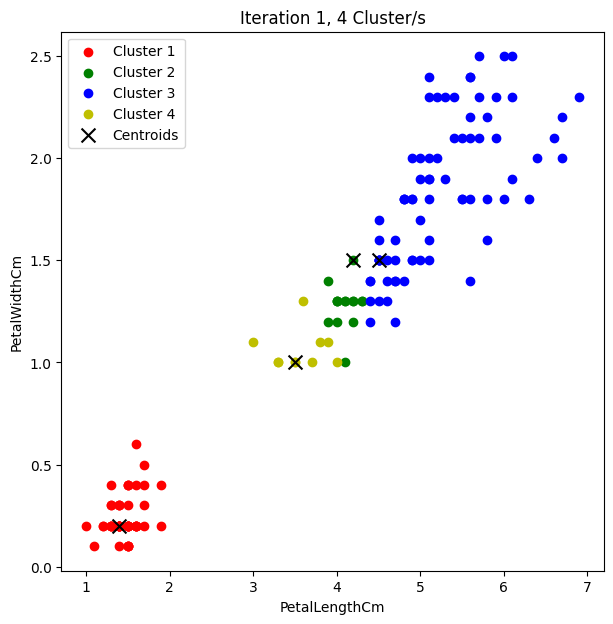

Iteration 1, 4 Cluster/s. WCSS: 94.31


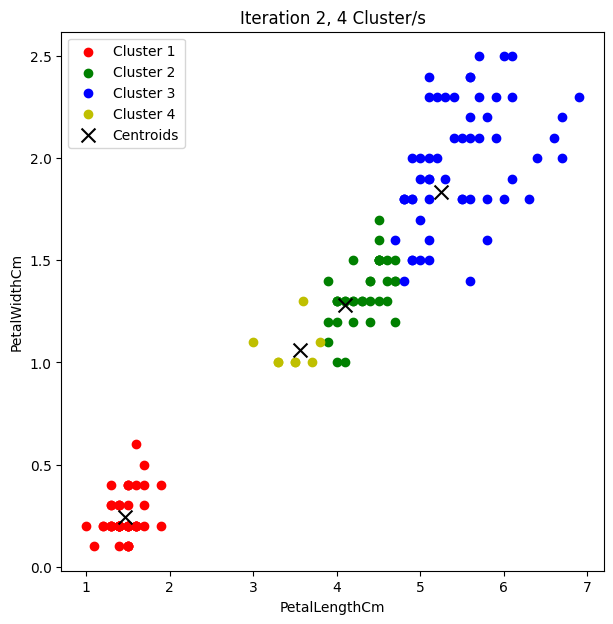

Iteration 2, 4 Cluster/s. WCSS: 33.80854044444441


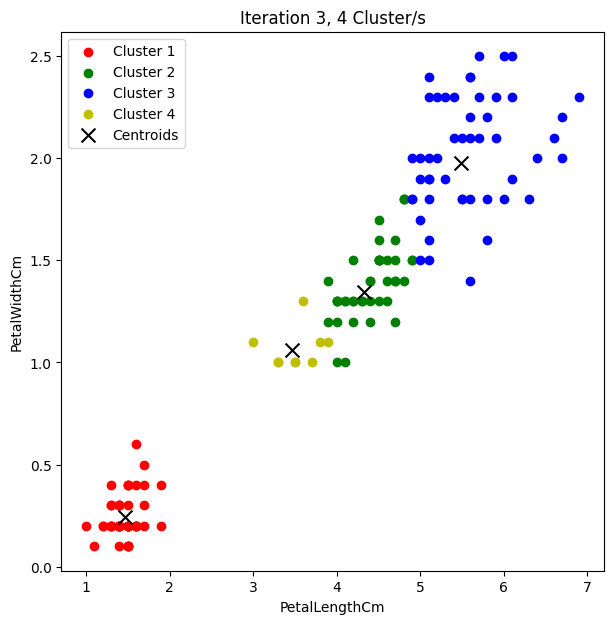

Iteration 3, 4 Cluster/s. WCSS: 25.661558068783076


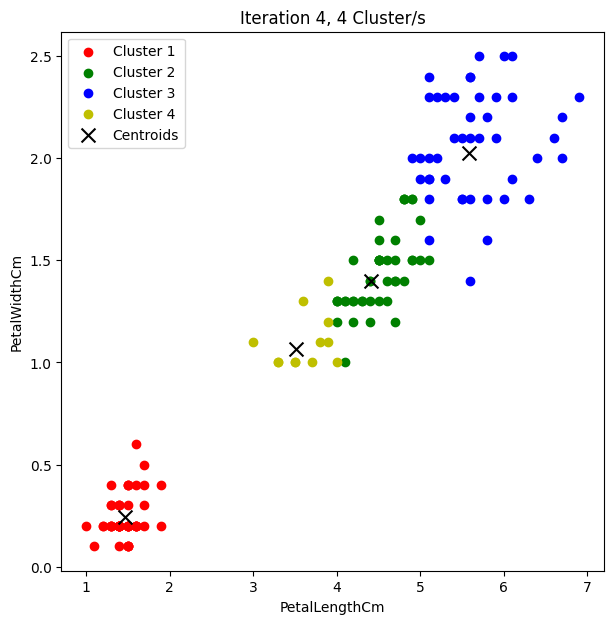

Iteration 4, 4 Cluster/s. WCSS: 23.818521400033948


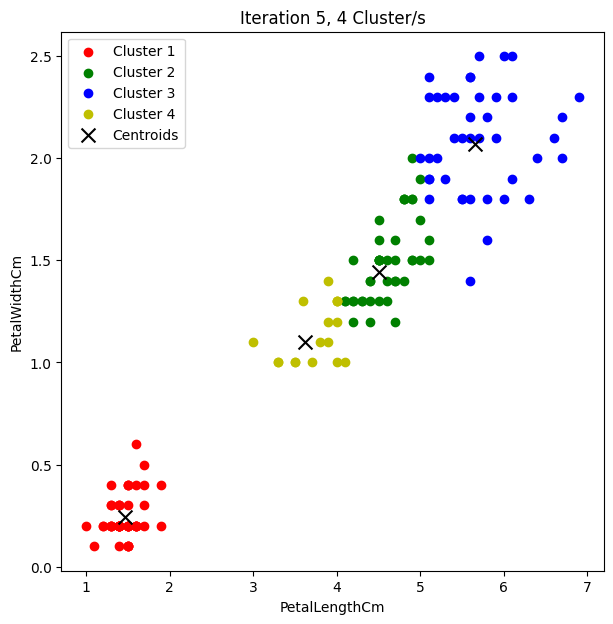

Iteration 5, 4 Cluster/s. WCSS: 22.061615679522504


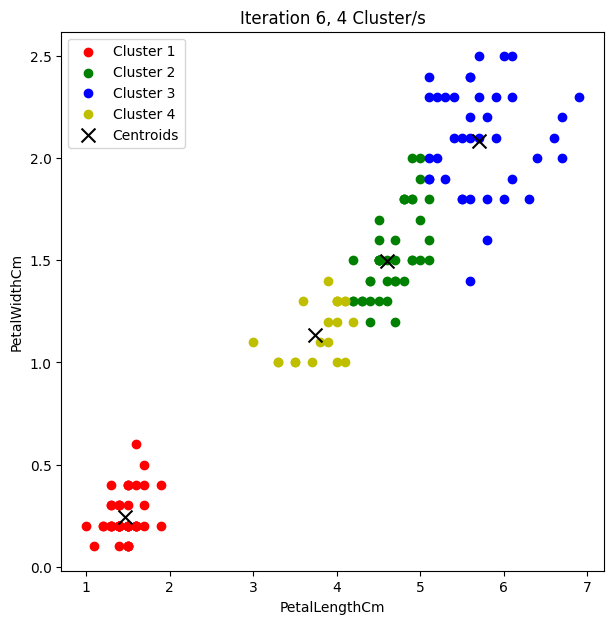

Iteration 6, 4 Cluster/s. WCSS: 20.71939163552929


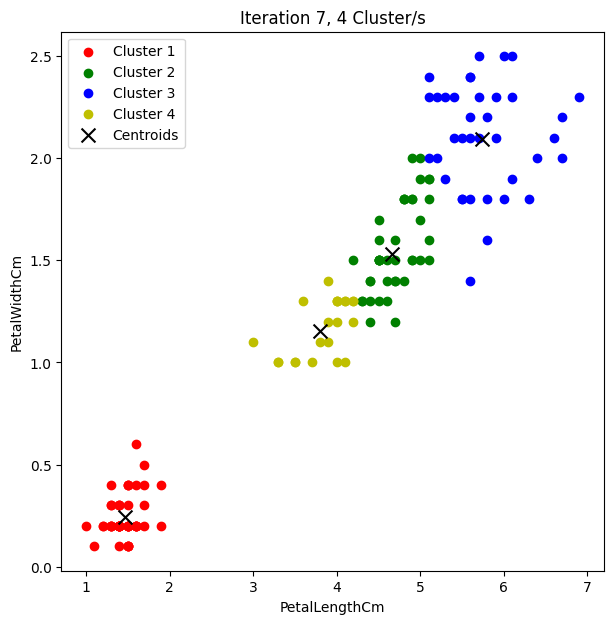

Iteration 7, 4 Cluster/s. WCSS: 20.025700477862753


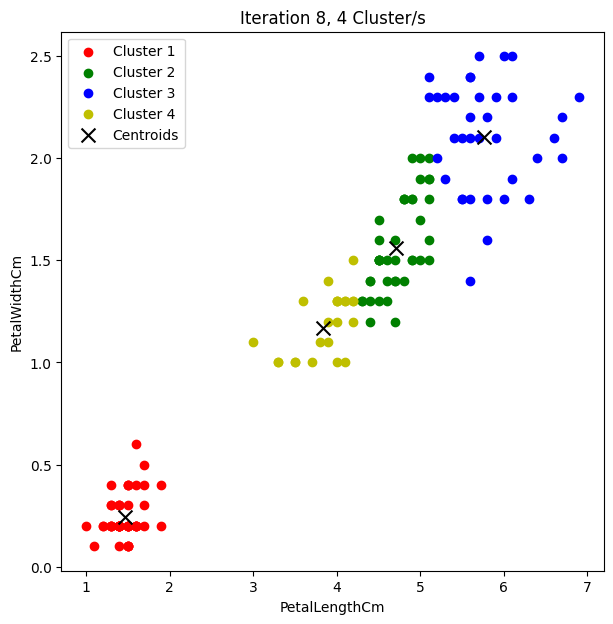

Iteration 8, 4 Cluster/s. WCSS: 19.70958821401526


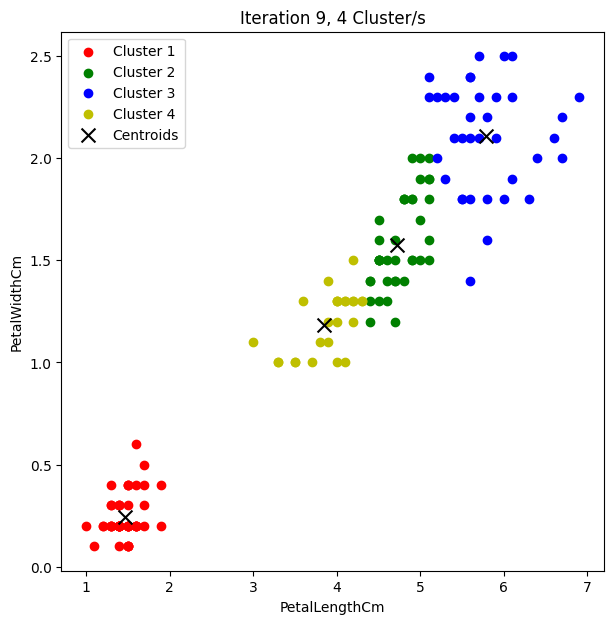

Iteration 9, 4 Cluster/s. WCSS: 19.58323893400185


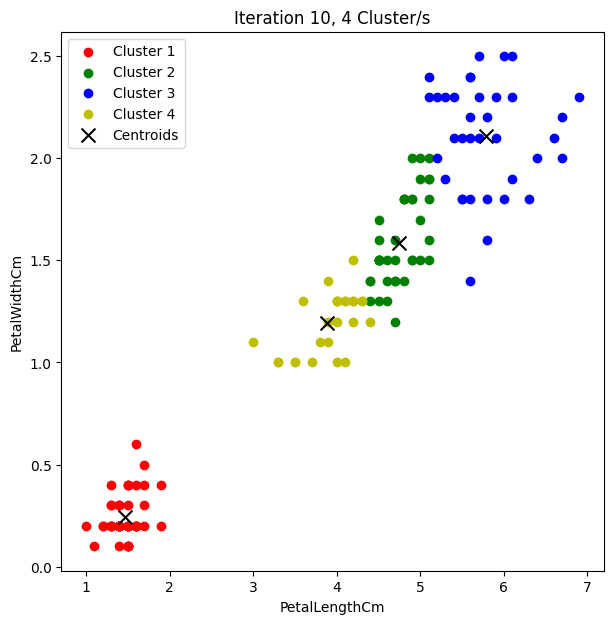

Iteration 10, 4 Cluster/s. WCSS: 19.516789033530564


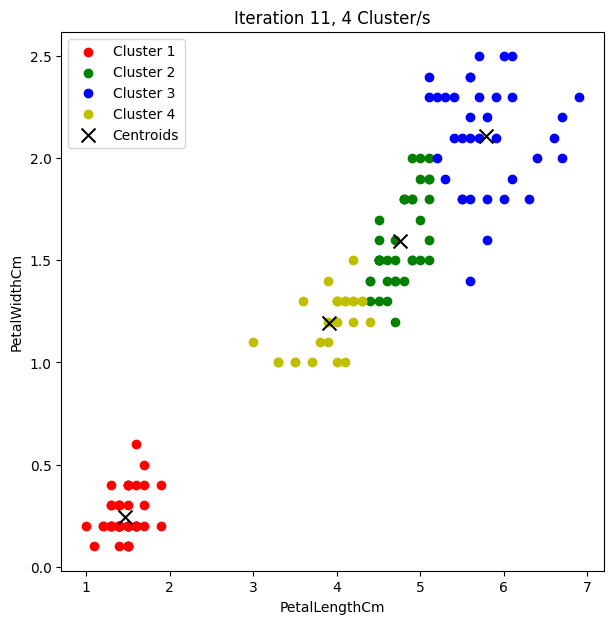

Iteration 11, 4 Cluster/s. WCSS: 19.4994008996851


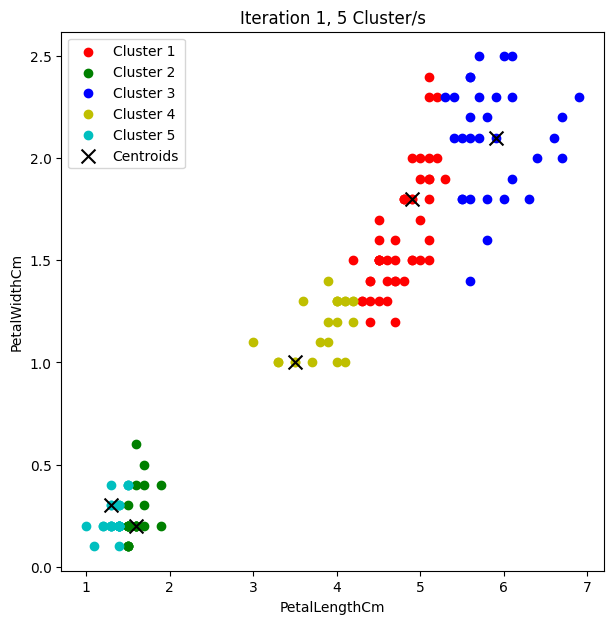

Iteration 1, 5 Cluster/s. WCSS: 24.730000000000004


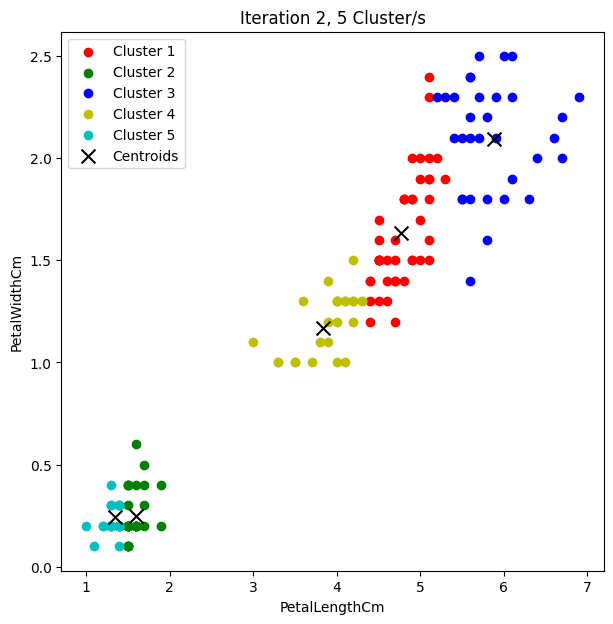

Iteration 2, 5 Cluster/s. WCSS: 18.913955570227337


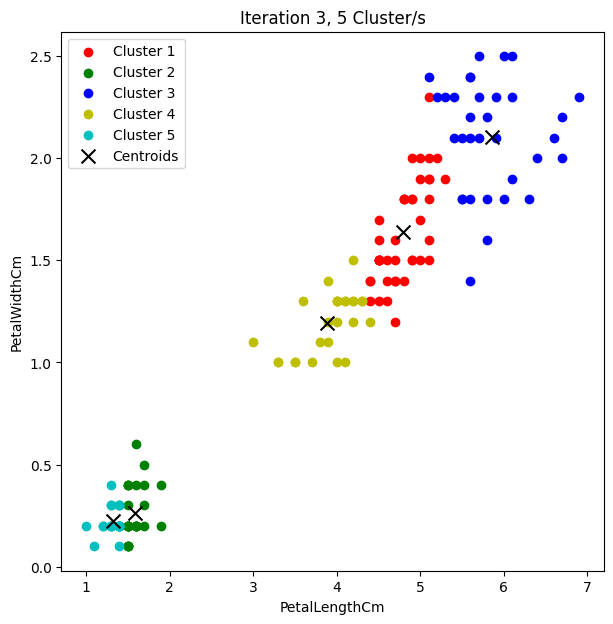

Iteration 3, 5 Cluster/s. WCSS: 18.675380224282392


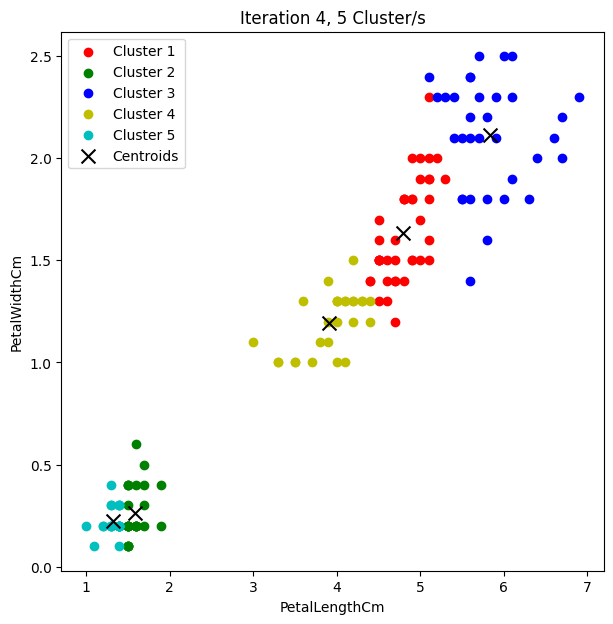

Iteration 4, 5 Cluster/s. WCSS: 18.637638496997674


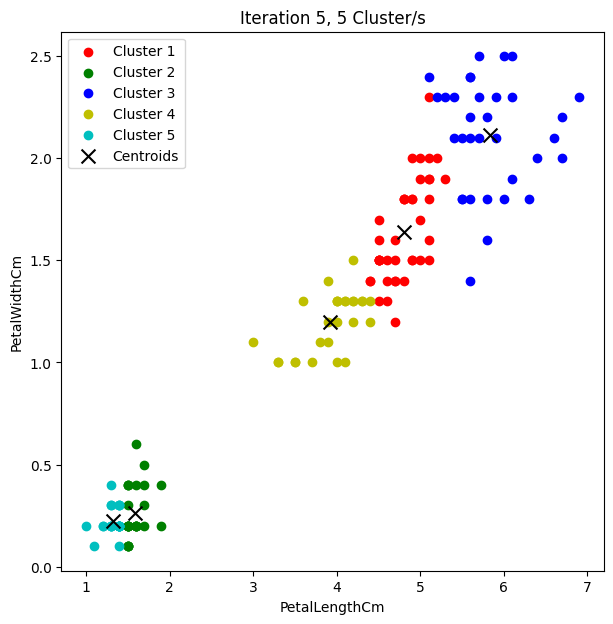

Iteration 5, 5 Cluster/s. WCSS: 18.621533596837935


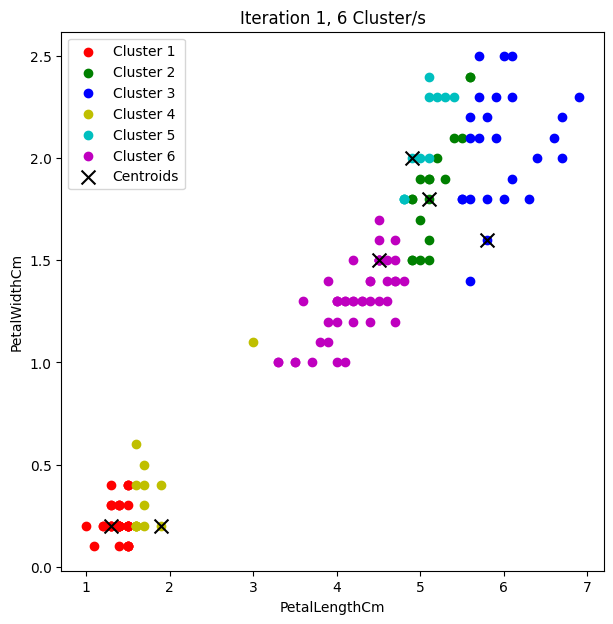

Iteration 1, 6 Cluster/s. WCSS: 33.56000000000001


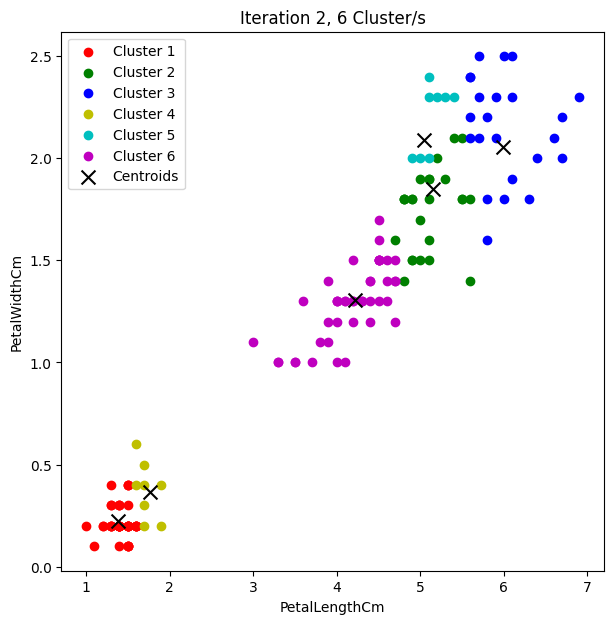

Iteration 2, 6 Cluster/s. WCSS: 19.187431704984263


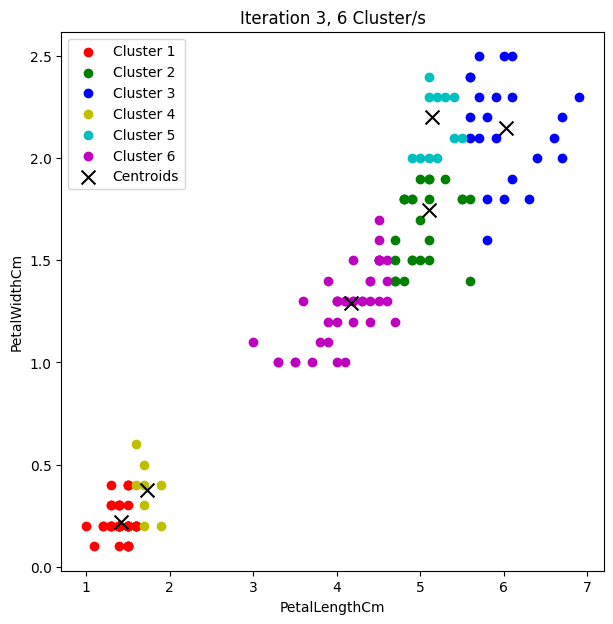

Iteration 3, 6 Cluster/s. WCSS: 17.876763232658327


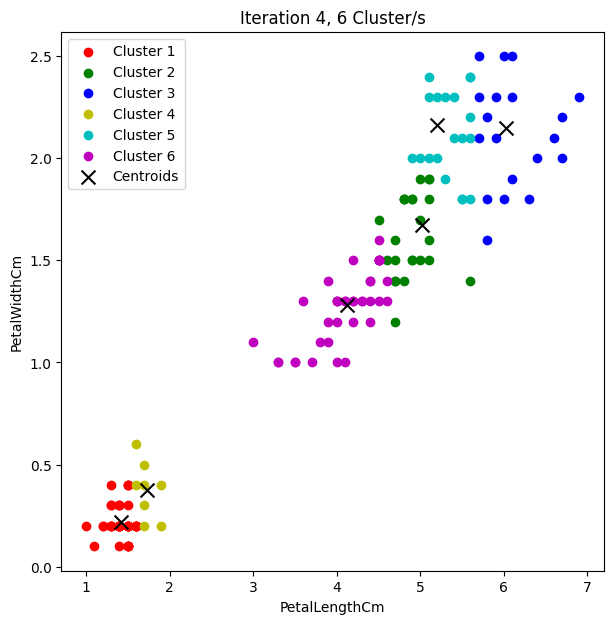

Iteration 4, 6 Cluster/s. WCSS: 17.093454053621095


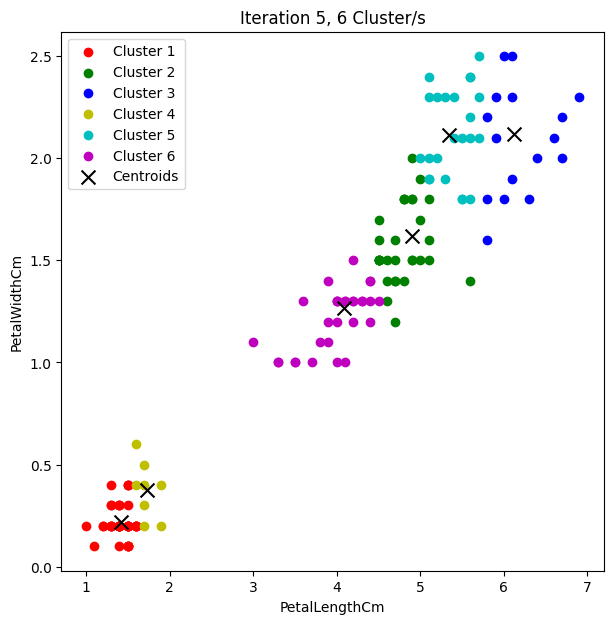

In [ ]:
# Elbow Method to determine optimal k
wcss_values = []
for i in range(1, 11):
    centroids, clusters, _ = k_means(adjusted_df.values.tolist(), i)
    wcss_values.append(compute_wcss(clusters, centroids))

In [ ]:
def evaluate_clustering(true_labels, predicted_labels):
    label_mapping = {}
    for cluster_id in np.unique(predicted_labels):
        mask = (np.array(predicted_labels) == cluster_id)
        if np.any(mask):  # Ensure mask is not empty
            most_common_label = mode(true_labels[mask], keepdims=True).mode[0]
            label_mapping[cluster_id] = most_common_label
    mapped_predictions = np.vectorize(label_mapping.get)(predicted_labels)
    
    cm = confusion_matrix(true_labels, mapped_predictions)
    acc = accuracy_score(true_labels, mapped_predictions)
    prec = precision_score(true_labels, mapped_predictions, average='weighted', zero_division=0)
    rec = recall_score(true_labels, mapped_predictions, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, mapped_predictions, average='weighted', zero_division=0)
    
    print("\nConfusion Matrix:")
    print(cm)
    print(f"\nAccuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    return cm, acc, prec, rec, f1

evaluate_clustering(true_labels, np.array(predicted_labels))

GROUP 1: K-MEANS CLUSTERING


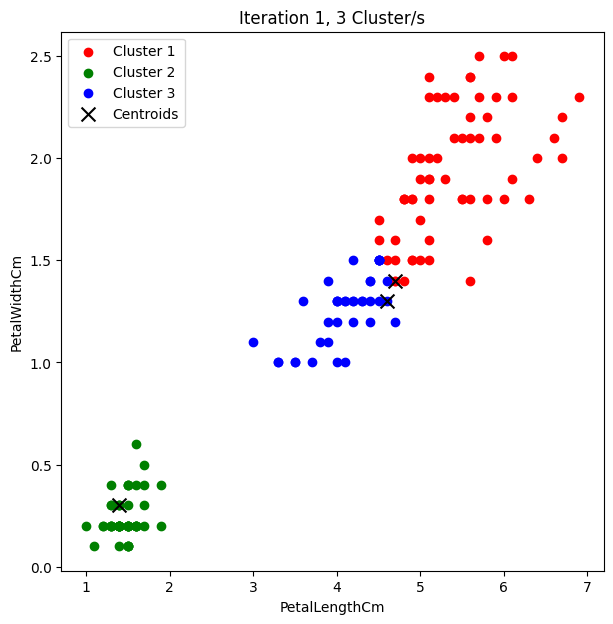

Iteration 1, 3 Cluster/s. WCSS: 94.67999999999995


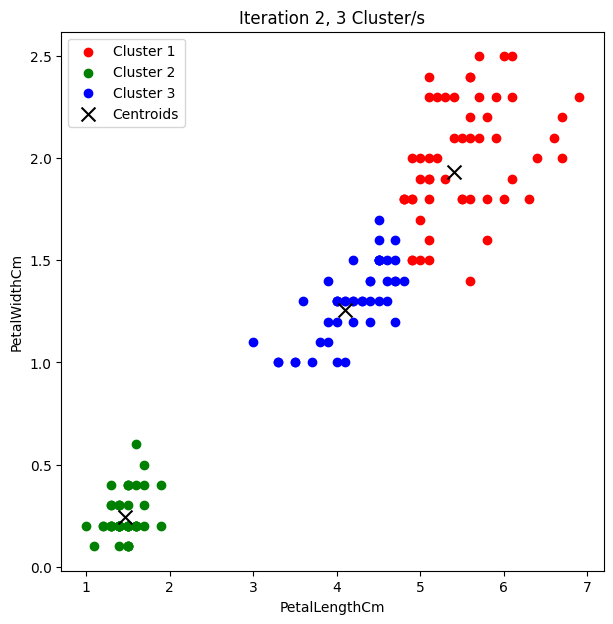

Iteration 2, 3 Cluster/s. WCSS: 33.36157818754126


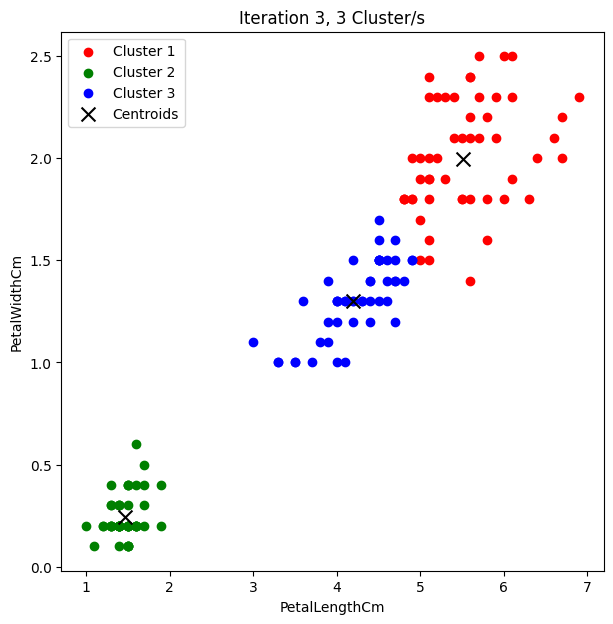

Iteration 3, 3 Cluster/s. WCSS: 31.799010075173566


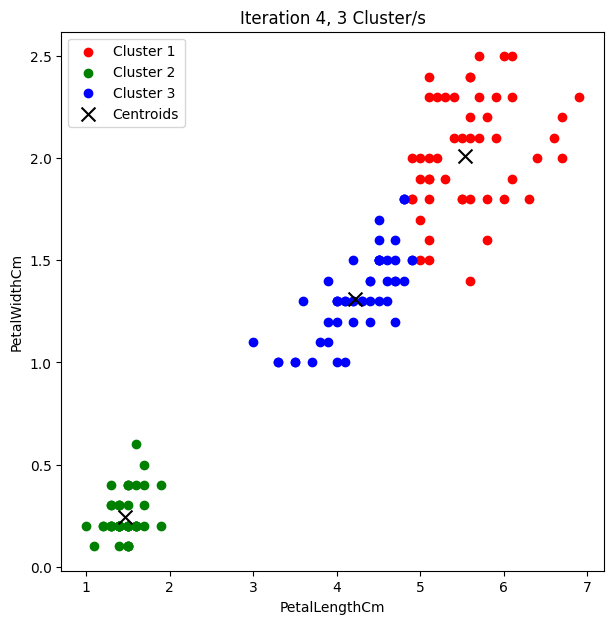

Iteration 4, 3 Cluster/s. WCSS: 31.65871596708581


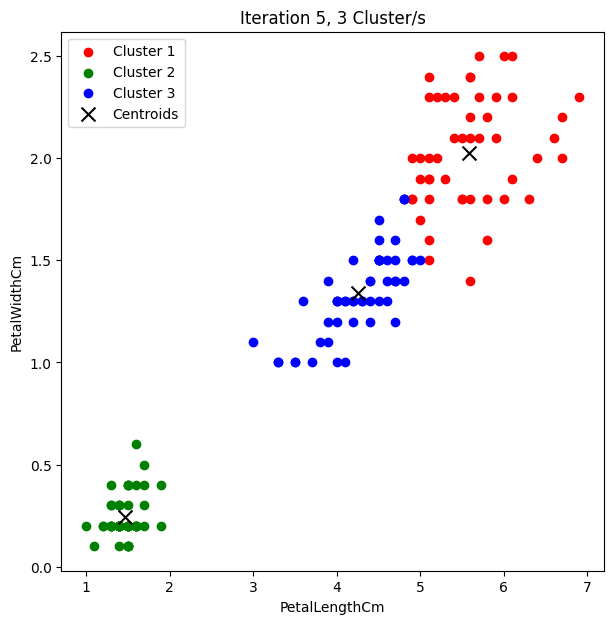

Iteration 5, 3 Cluster/s. WCSS: 31.411805595931877


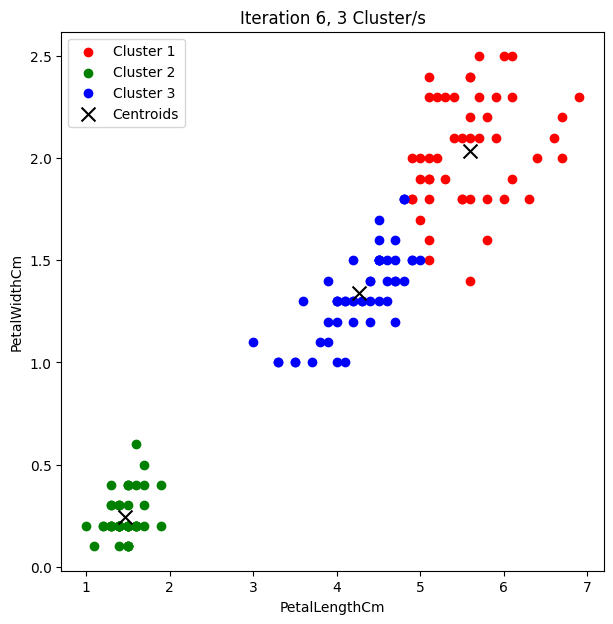

Iteration 6, 3 Cluster/s. WCSS: 31.387758974358977


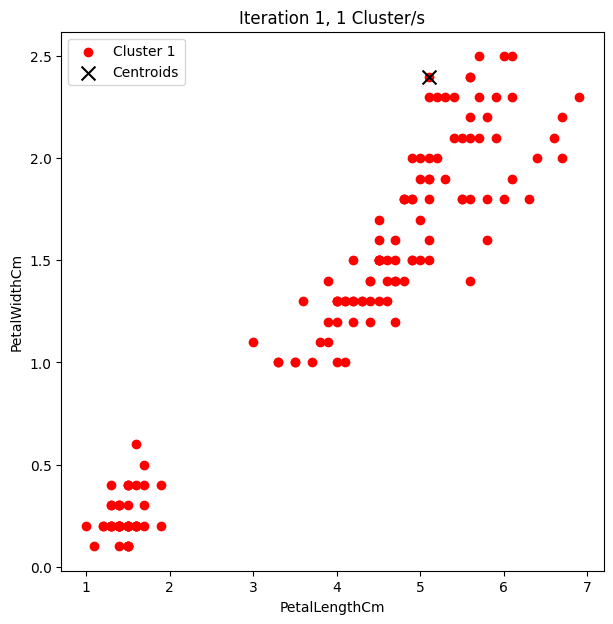

Iteration 1, 1 Cluster/s. WCSS: 1036.9999999999998


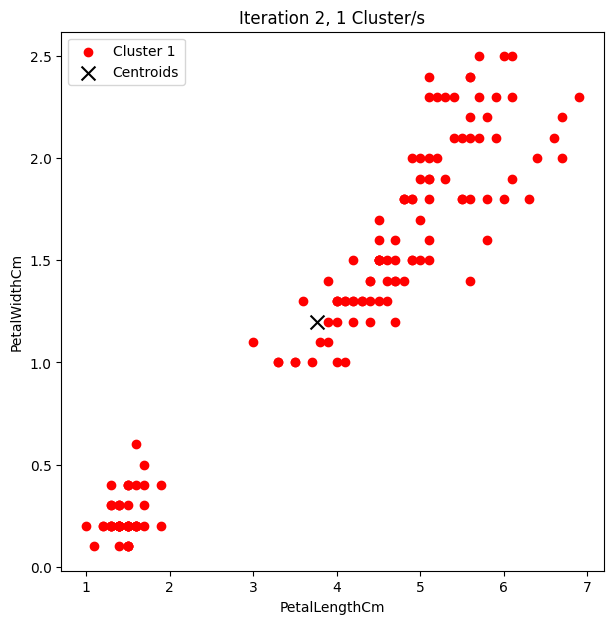

Iteration 2, 1 Cluster/s. WCSS: 550.6434666666671


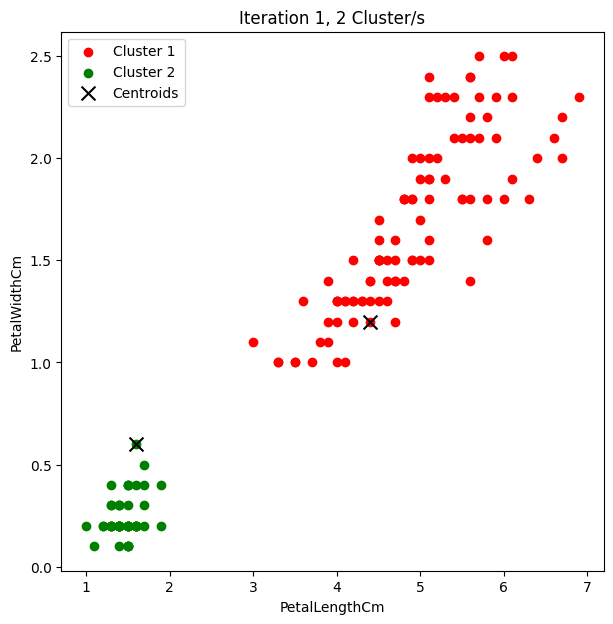

Iteration 1, 2 Cluster/s. WCSS: 142.89999999999975


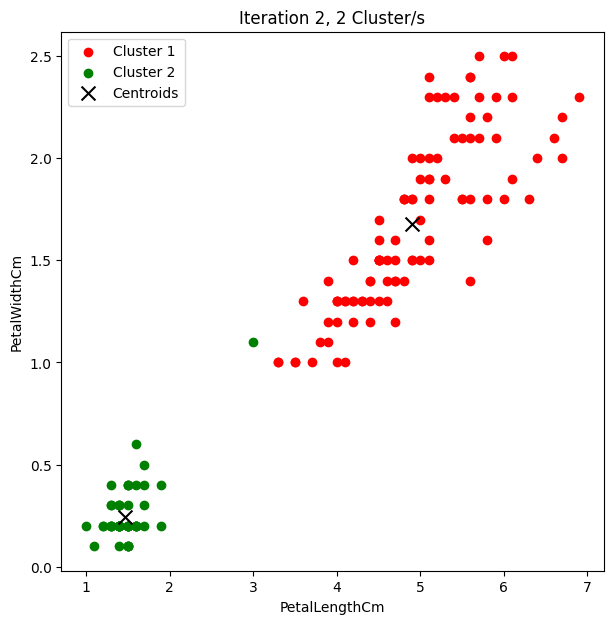

Iteration 2, 2 Cluster/s. WCSS: 86.50461999999995


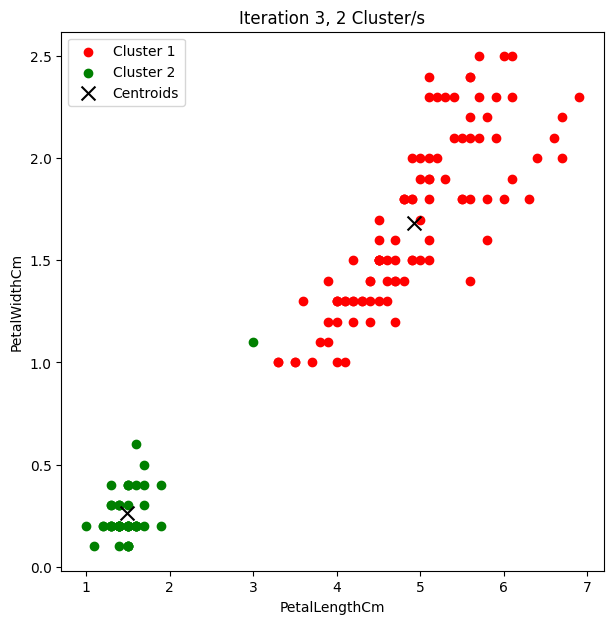

Iteration 3, 2 Cluster/s. WCSS: 86.40394533571


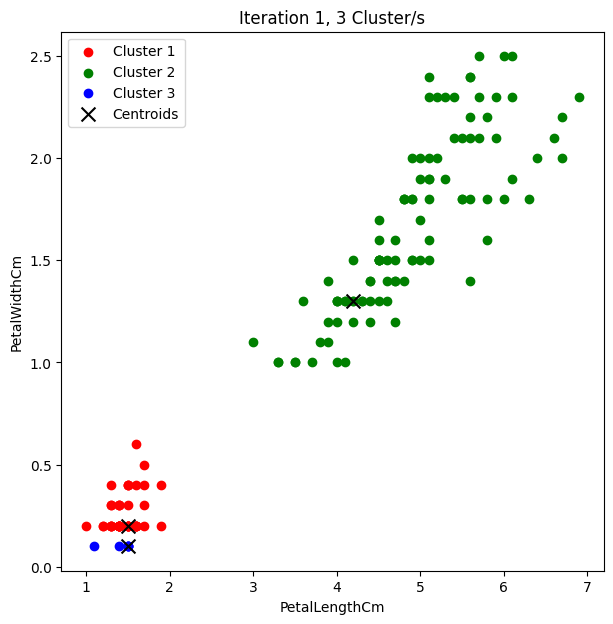

Iteration 1, 3 Cluster/s. WCSS: 151.4599999999999


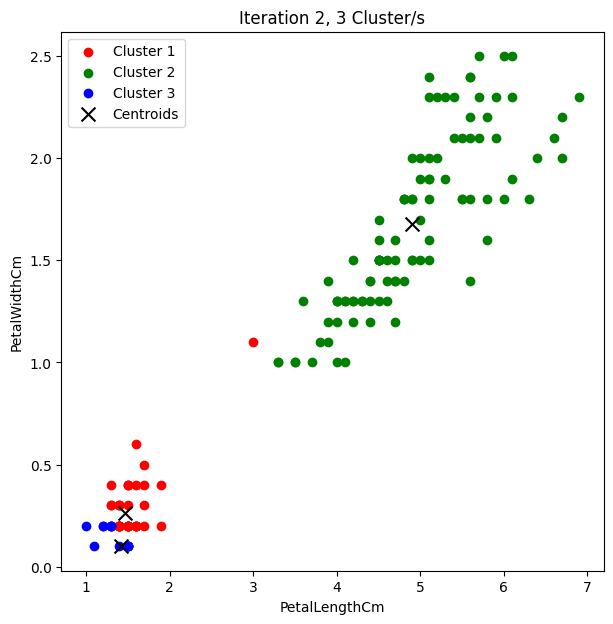

Iteration 2, 3 Cluster/s. WCSS: 86.17470338108352


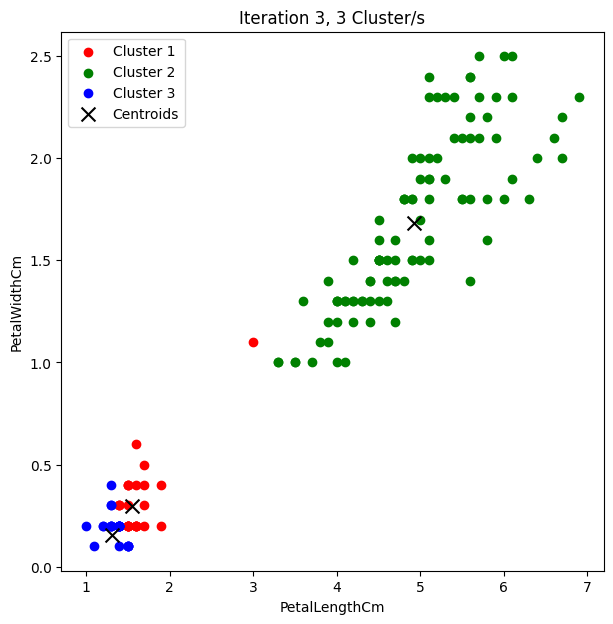

Iteration 3, 3 Cluster/s. WCSS: 85.35067659747493


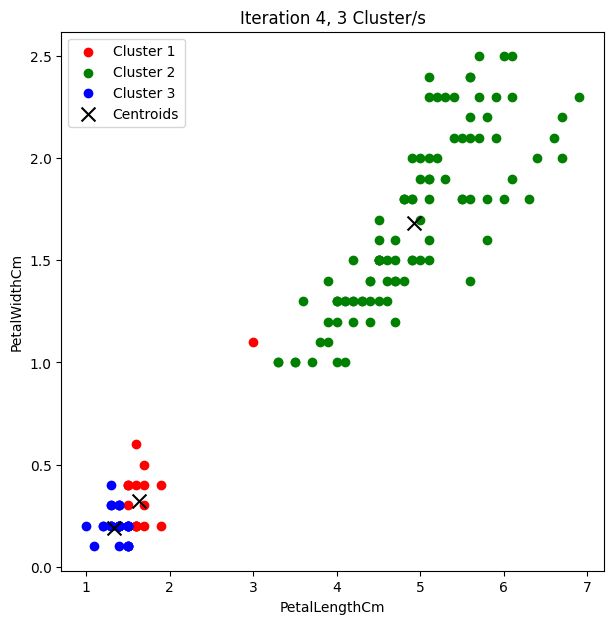

Iteration 4, 3 Cluster/s. WCSS: 84.97989758698087


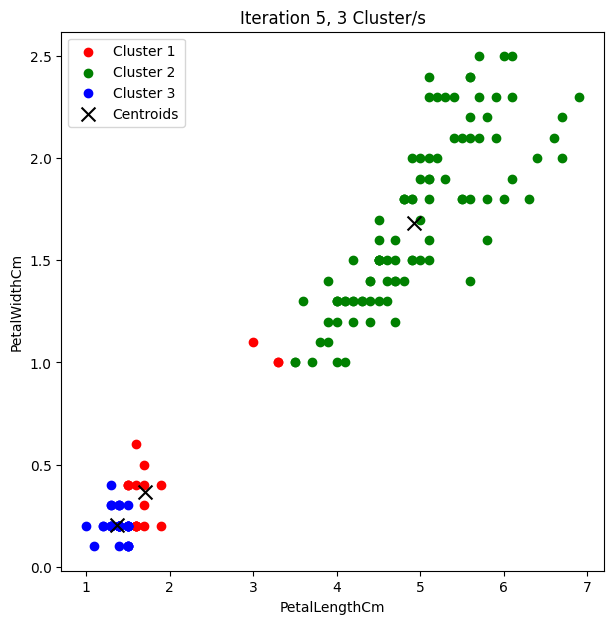

Iteration 5, 3 Cluster/s. WCSS: 84.39676359555146


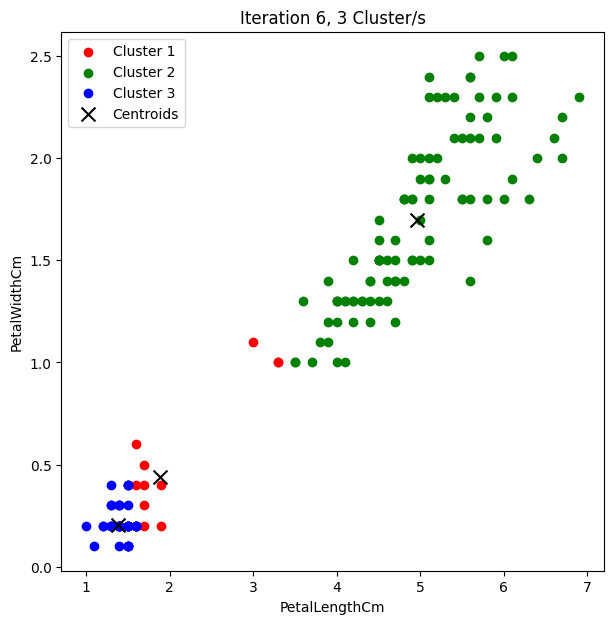

Iteration 6, 3 Cluster/s. WCSS: 82.8114702404062


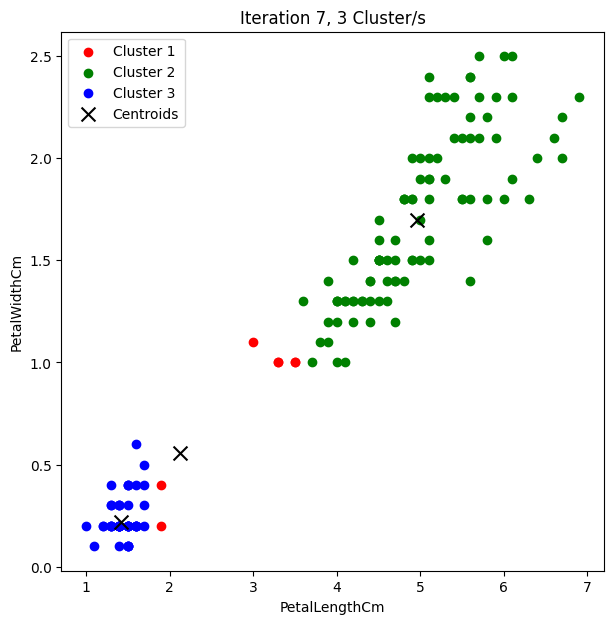

Iteration 7, 3 Cluster/s. WCSS: 80.08222335723504


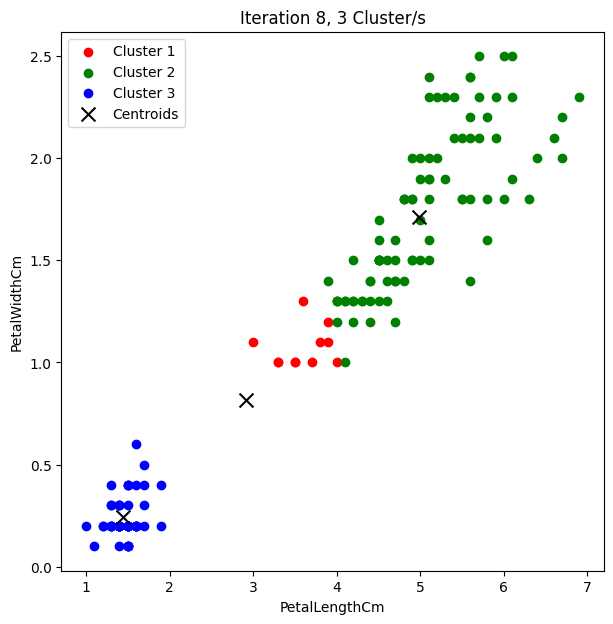

Iteration 8, 3 Cluster/s. WCSS: 67.99021346638838


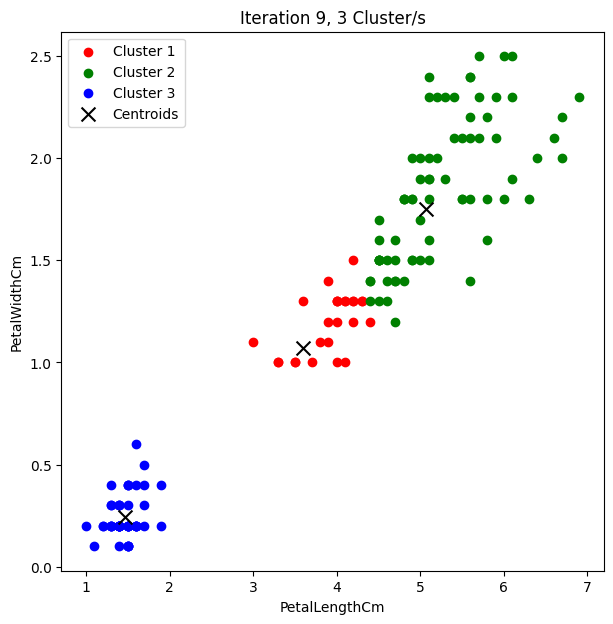

Iteration 9, 3 Cluster/s. WCSS: 50.1209019380431


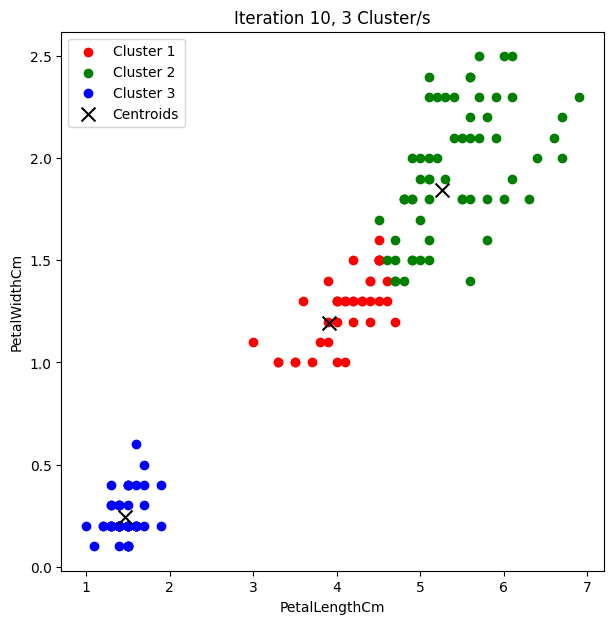

Iteration 10, 3 Cluster/s. WCSS: 39.52692109906163


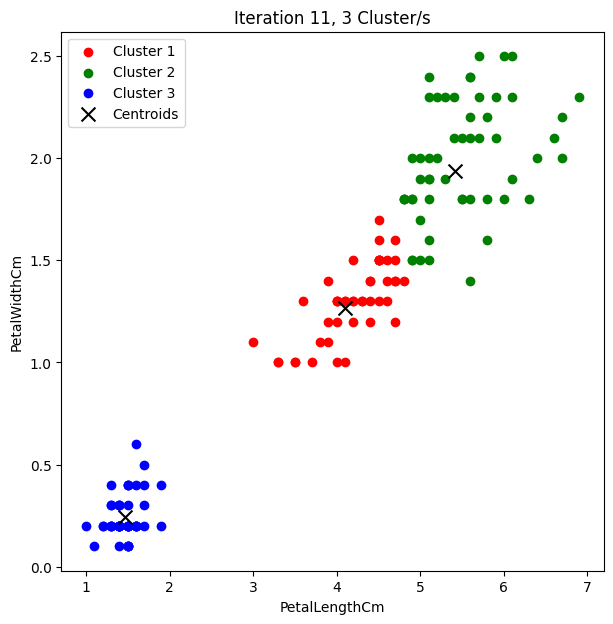

Iteration 11, 3 Cluster/s. WCSS: 33.04044334515209


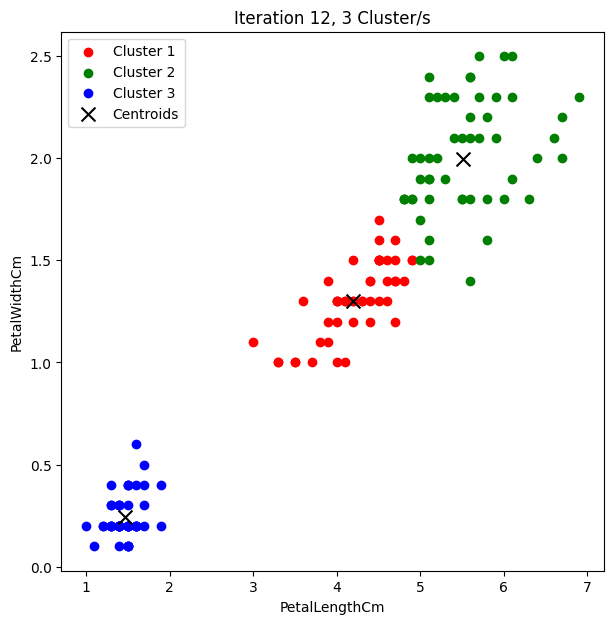

Iteration 12, 3 Cluster/s. WCSS: 31.79901007517355


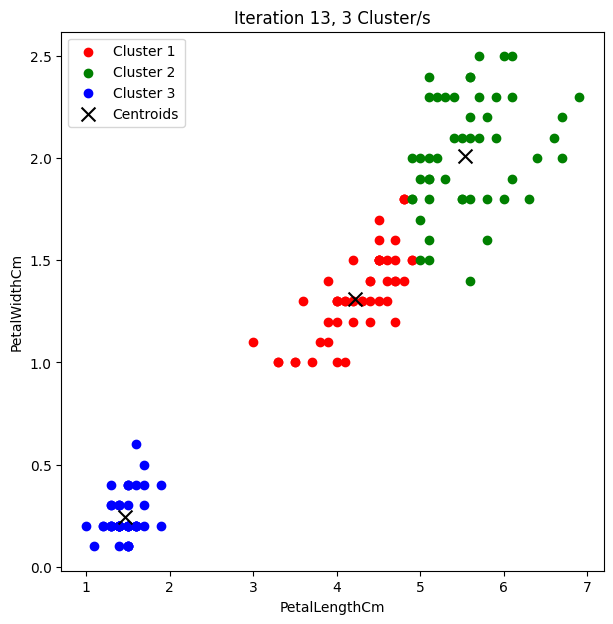

Iteration 13, 3 Cluster/s. WCSS: 31.658715967085815


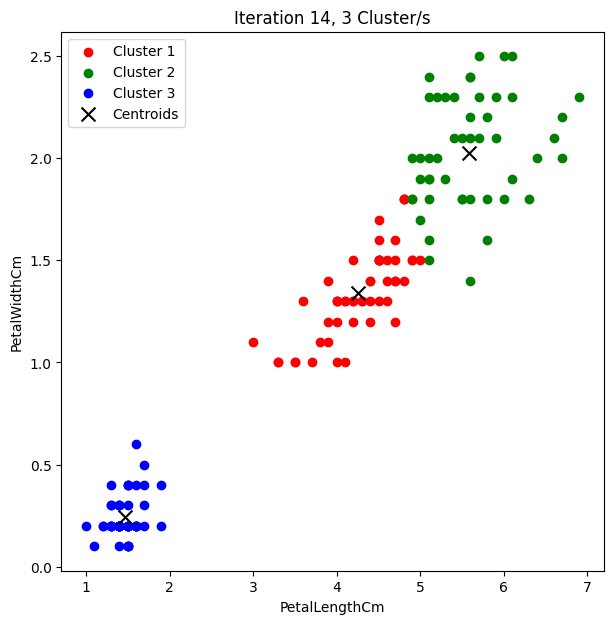

Iteration 14, 3 Cluster/s. WCSS: 31.411805595931867


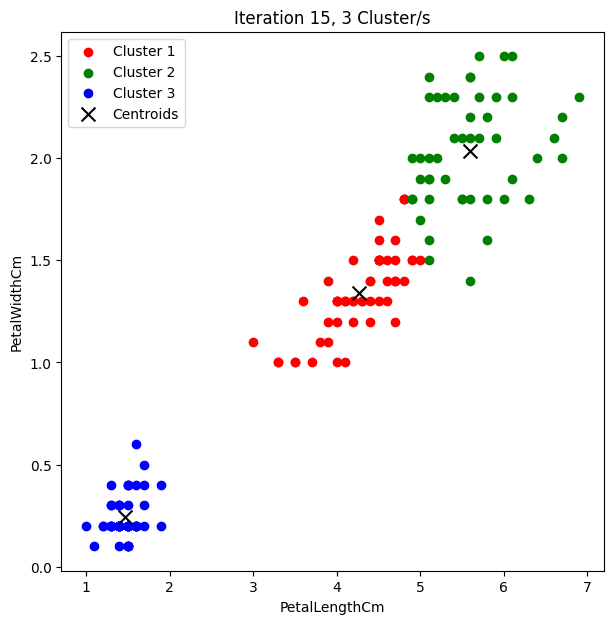

Iteration 15, 3 Cluster/s. WCSS: 31.38775897435899


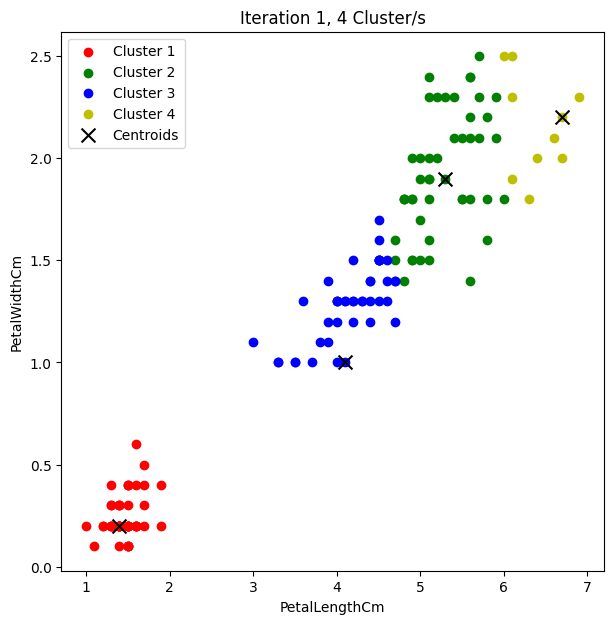

Iteration 1, 4 Cluster/s. WCSS: 27.730000000000008


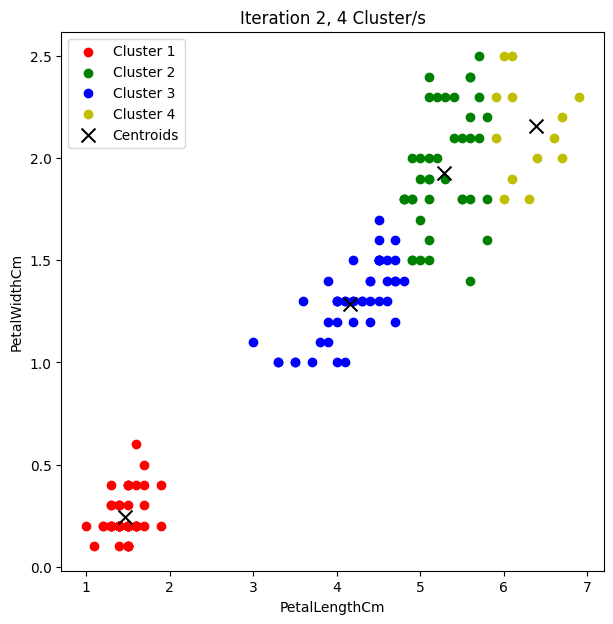

Iteration 2, 4 Cluster/s. WCSS: 21.70557454900193


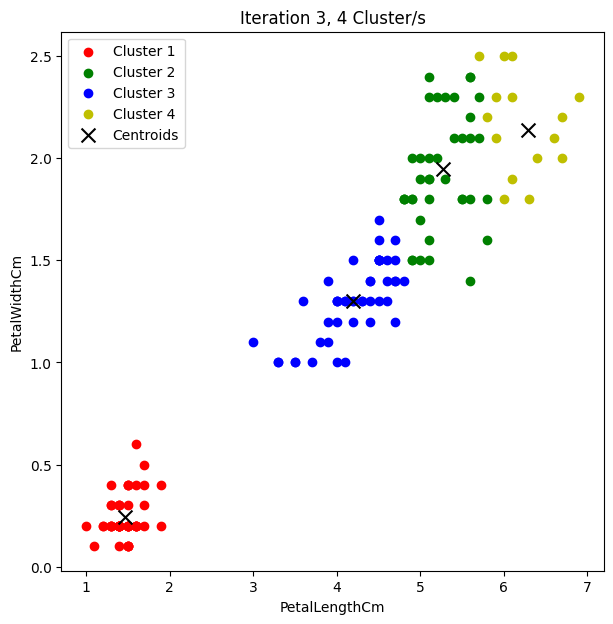

Iteration 3, 4 Cluster/s. WCSS: 21.339487602369555


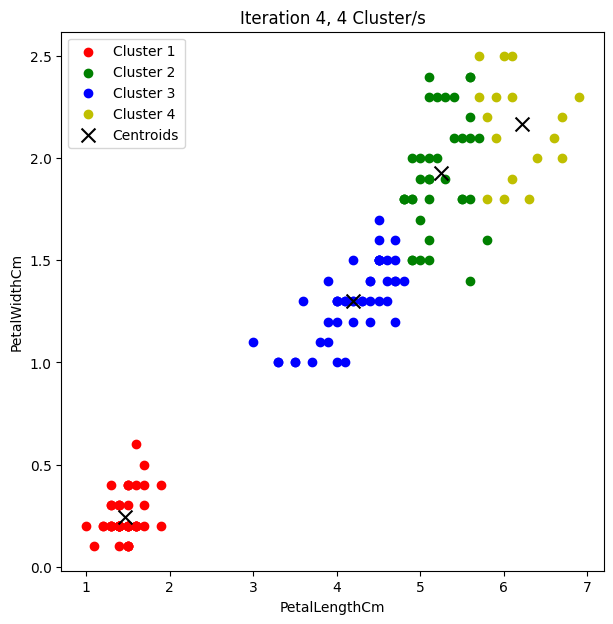

Iteration 4, 4 Cluster/s. WCSS: 21.130456353085776


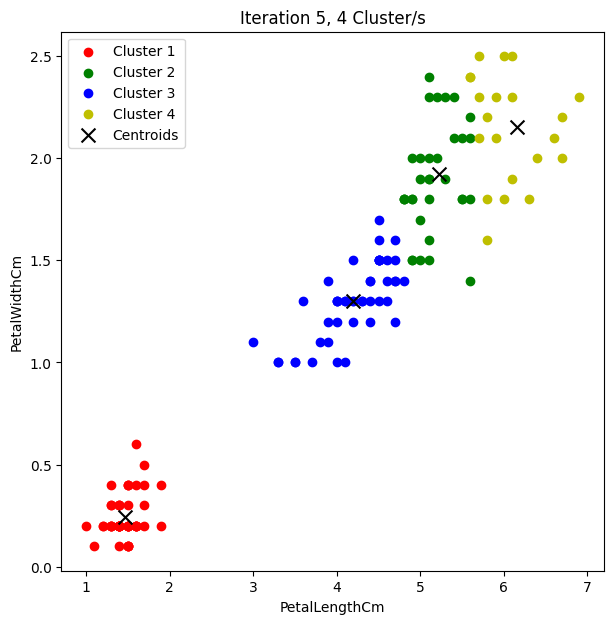

Iteration 5, 4 Cluster/s. WCSS: 20.989666017622703


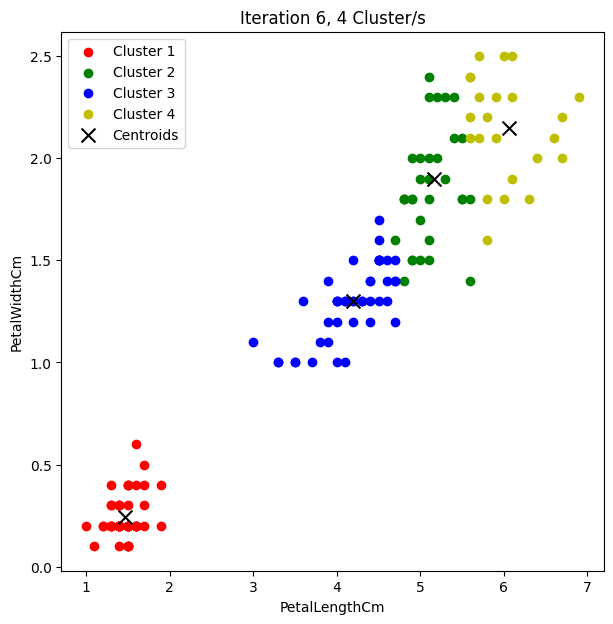

Iteration 6, 4 Cluster/s. WCSS: 20.571312329966066


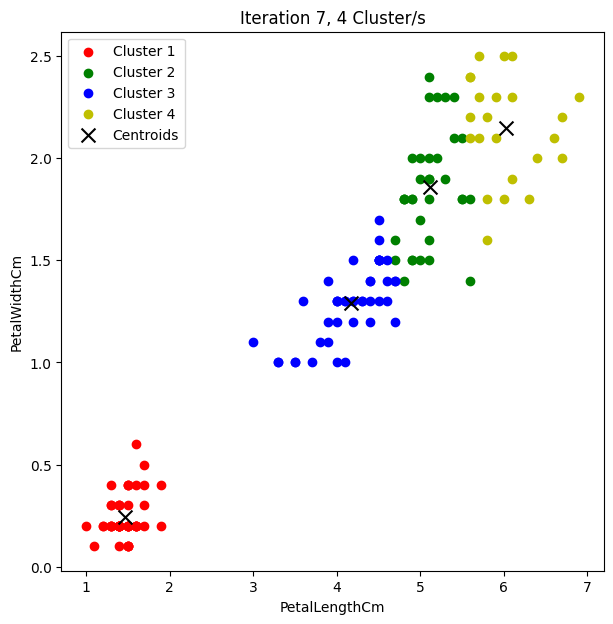

Iteration 7, 4 Cluster/s. WCSS: 20.33239234439255


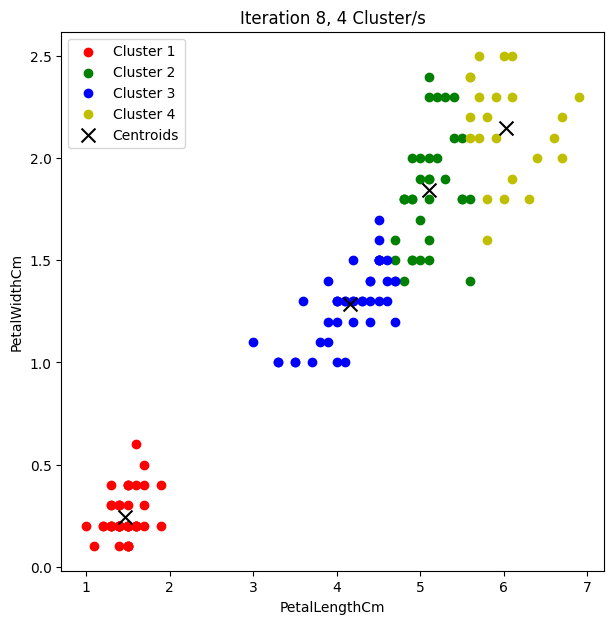

Iteration 8, 4 Cluster/s. WCSS: 20.316007803485398


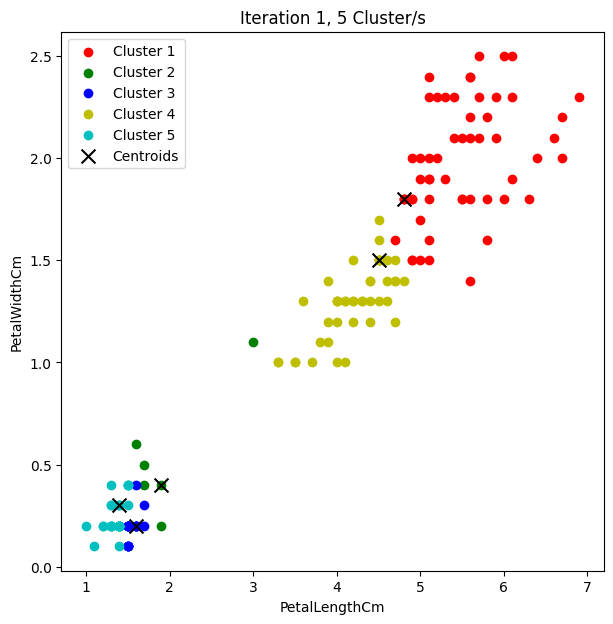

Iteration 1, 5 Cluster/s. WCSS: 66.21000000000004


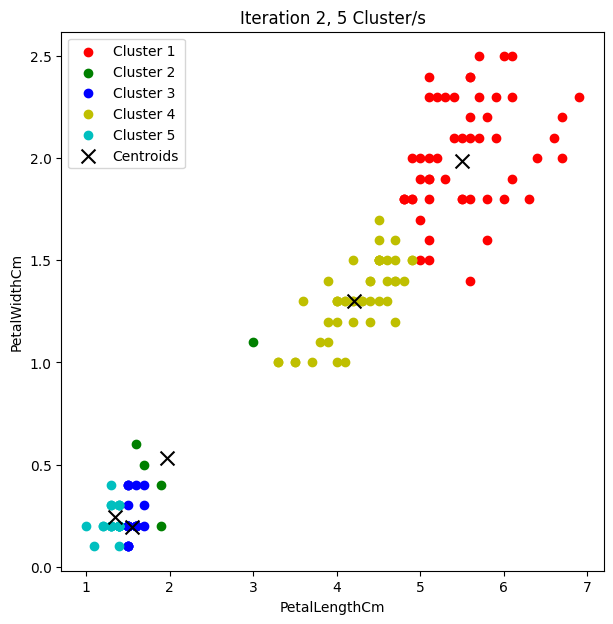

Iteration 2, 5 Cluster/s. WCSS: 30.809616225952052


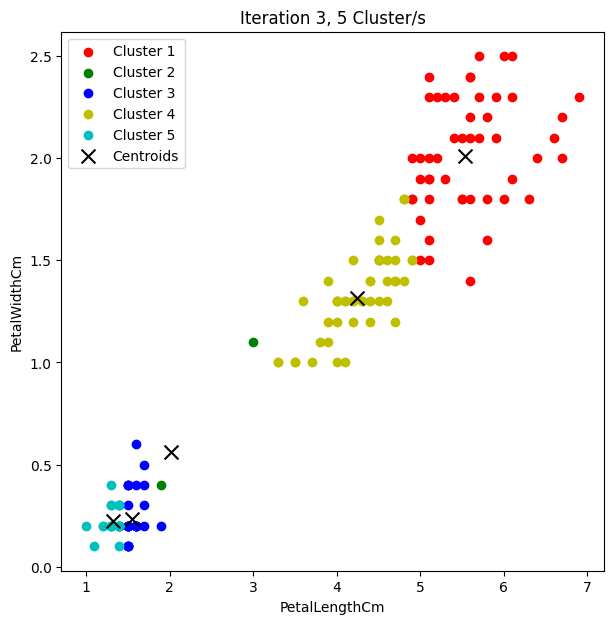

Iteration 3, 5 Cluster/s. WCSS: 30.301505652124963


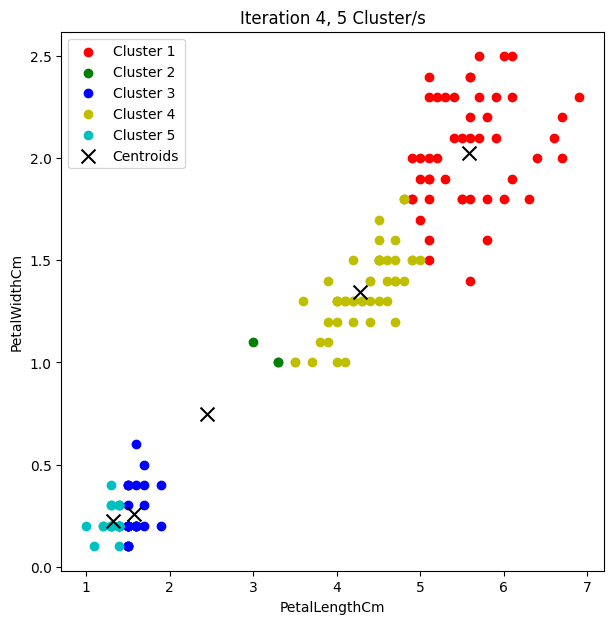

Iteration 4, 5 Cluster/s. WCSS: 28.6680102067891


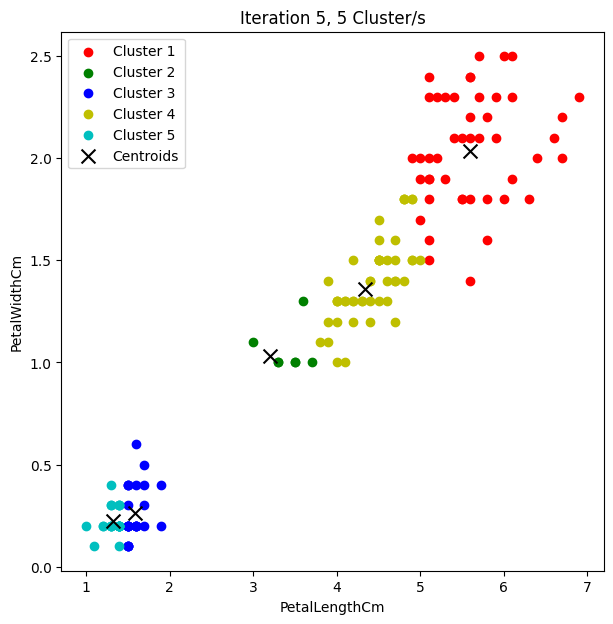

Iteration 5, 5 Cluster/s. WCSS: 24.437195003876532


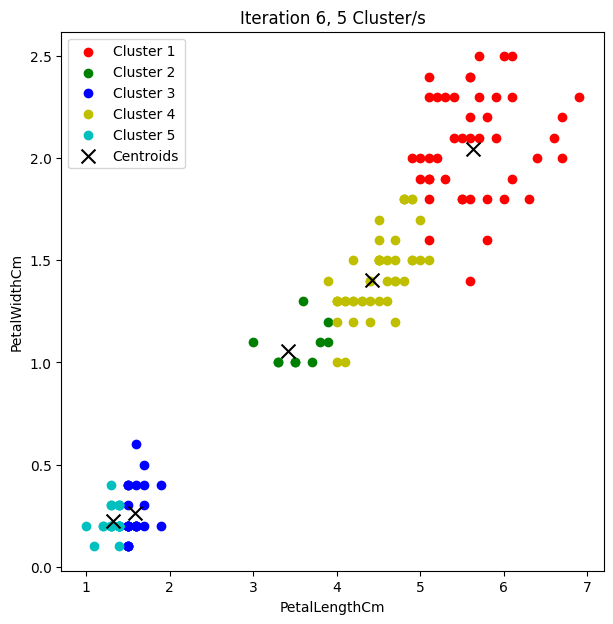

Iteration 6, 5 Cluster/s. WCSS: 22.88621650107312


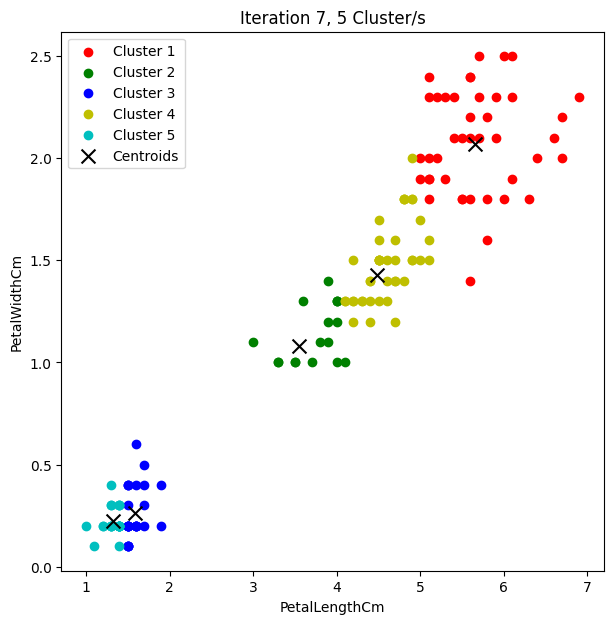

Iteration 7, 5 Cluster/s. WCSS: 21.79271117583005


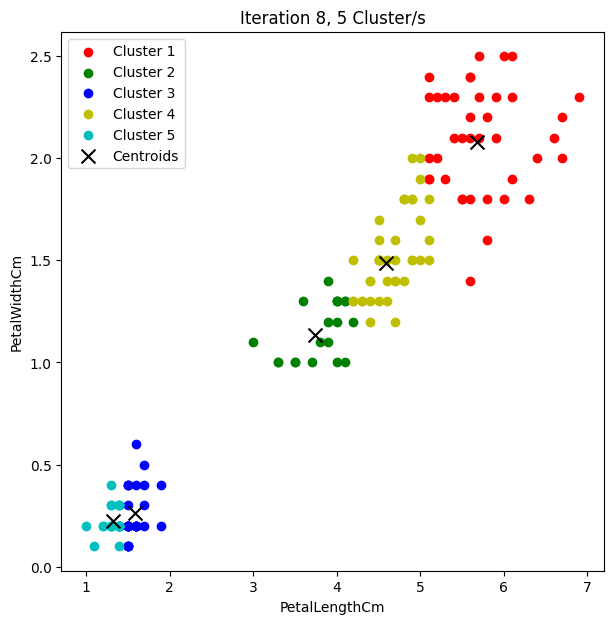

Iteration 8, 5 Cluster/s. WCSS: 19.976252591202048


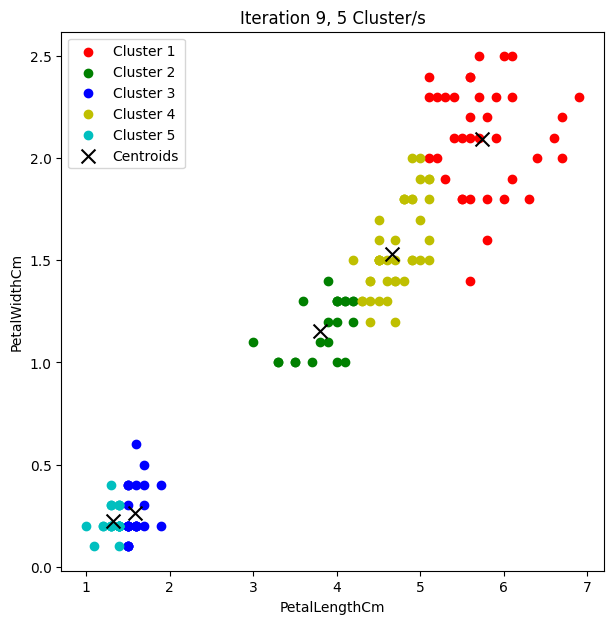

Iteration 9, 5 Cluster/s. WCSS: 19.142598384464993


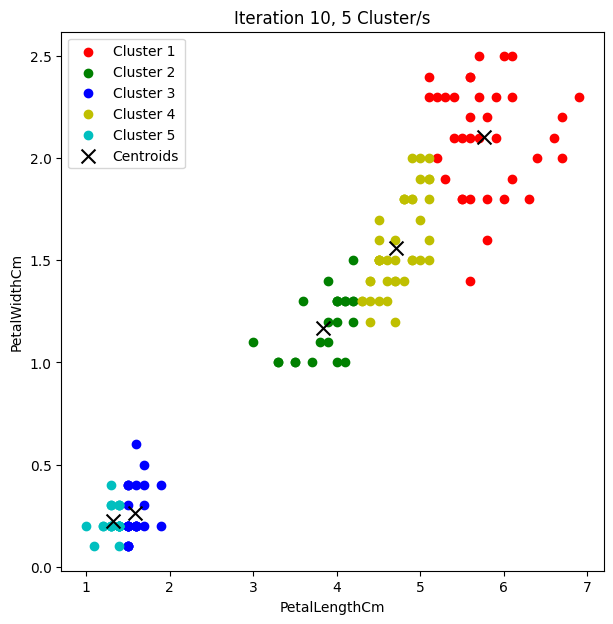

Iteration 10, 5 Cluster/s. WCSS: 18.826486120617524


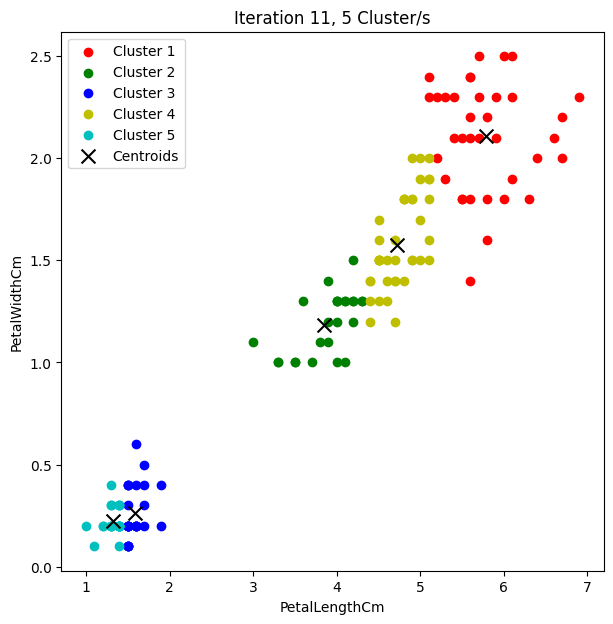

Iteration 11, 5 Cluster/s. WCSS: 18.700136840604102


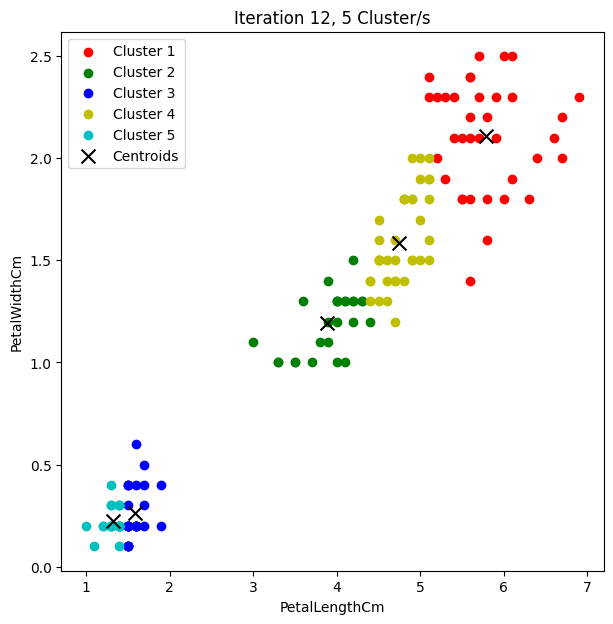

Iteration 12, 5 Cluster/s. WCSS: 18.63368694013282


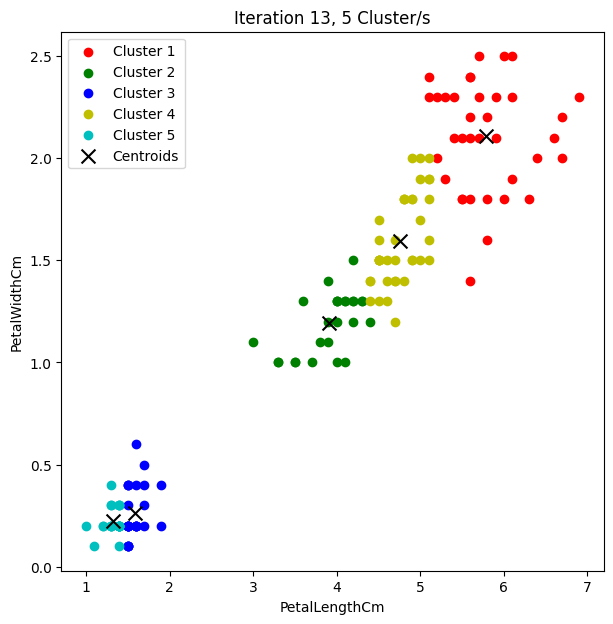

Iteration 13, 5 Cluster/s. WCSS: 18.616298806287364


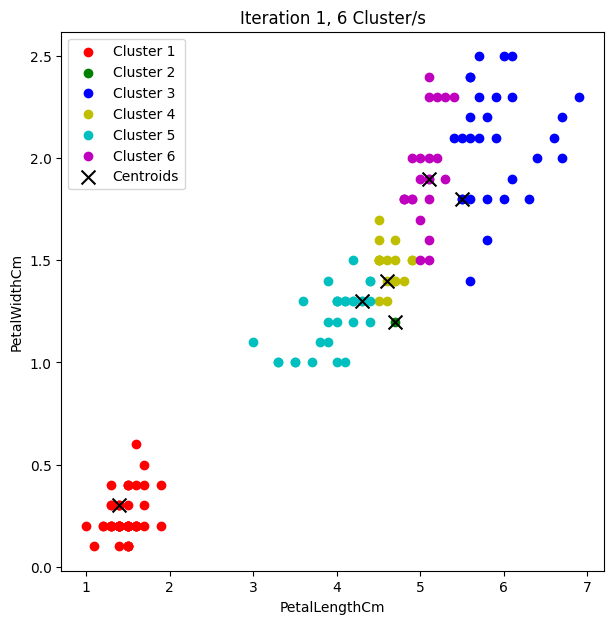

Iteration 1, 6 Cluster/s. WCSS: 27.500000000000014


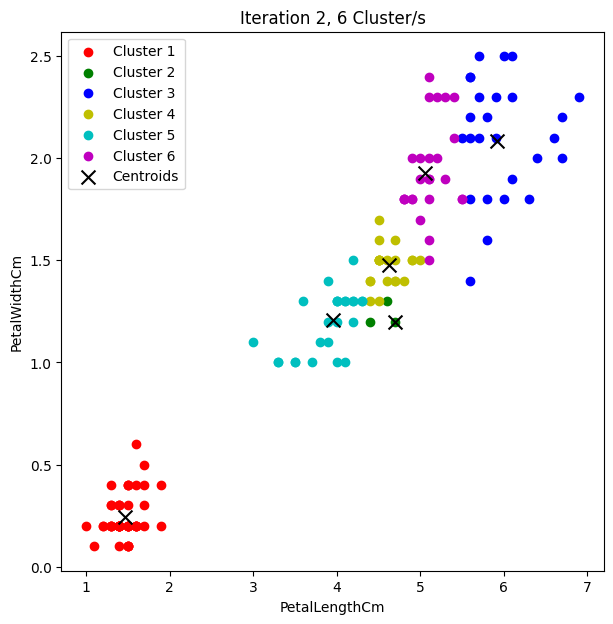

Iteration 2, 6 Cluster/s. WCSS: 14.973812005807861


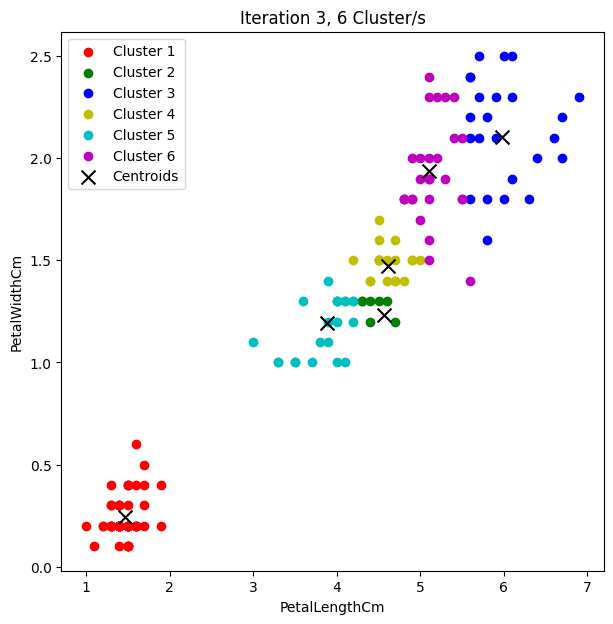

Iteration 3, 6 Cluster/s. WCSS: 14.160297675696704


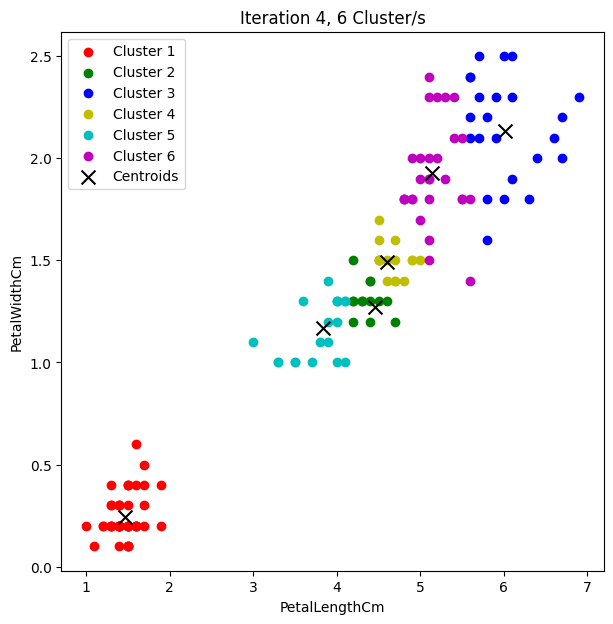

Iteration 4, 6 Cluster/s. WCSS: 13.506664212361134


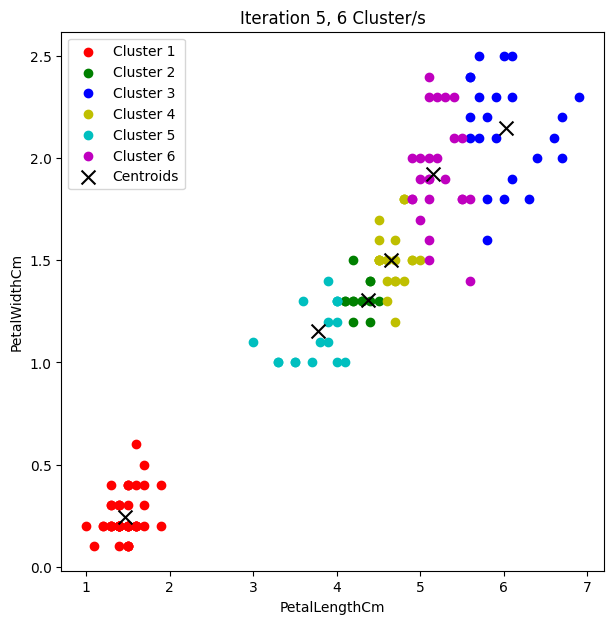

Iteration 5, 6 Cluster/s. WCSS: 13.016718738036461


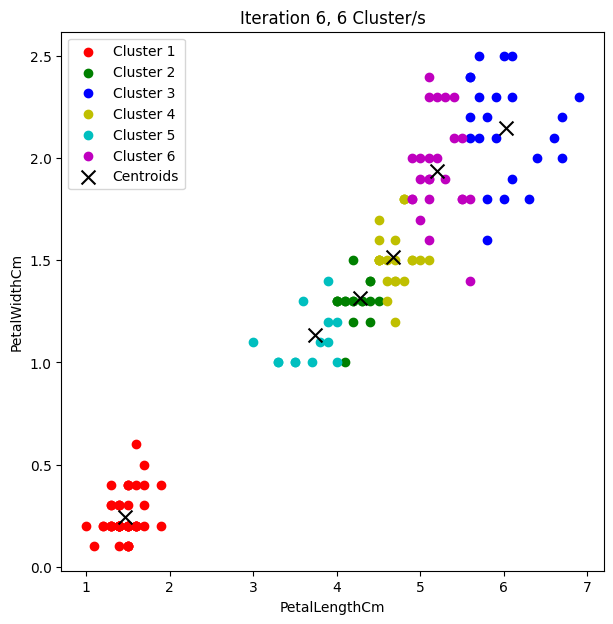

Iteration 6, 6 Cluster/s. WCSS: 12.742764073565992


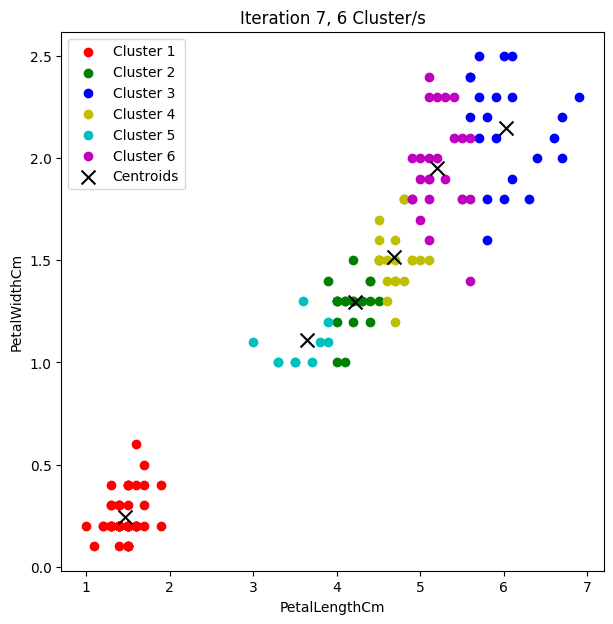

Iteration 7, 6 Cluster/s. WCSS: 12.427024835648158


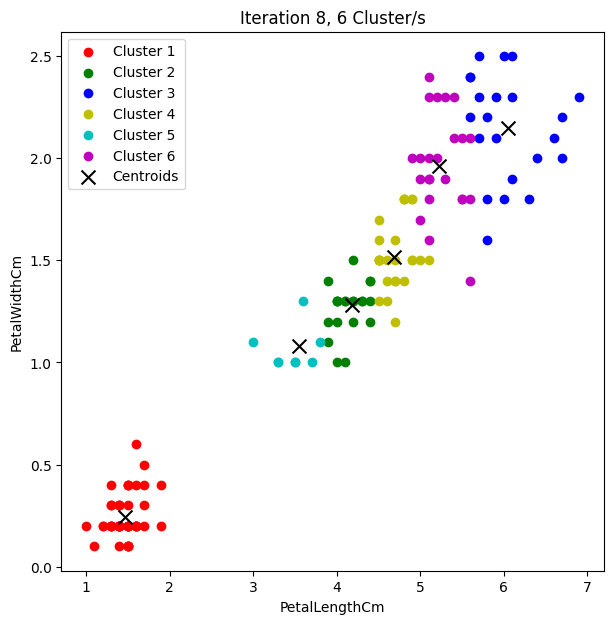

Iteration 8, 6 Cluster/s. WCSS: 12.194274235263796


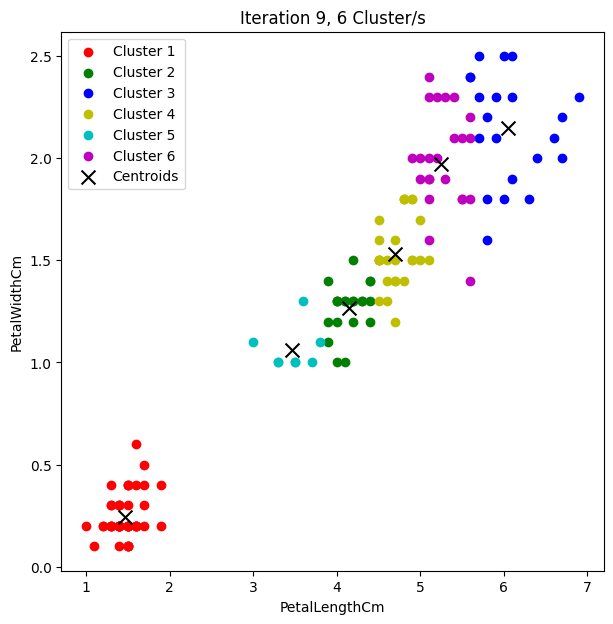

Iteration 9, 6 Cluster/s. WCSS: 12.017069391822327


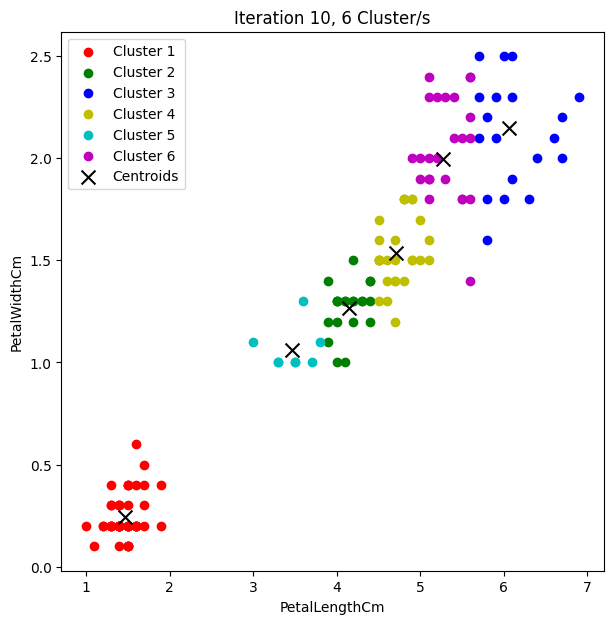

Iteration 10, 6 Cluster/s. WCSS: 11.921709932987799


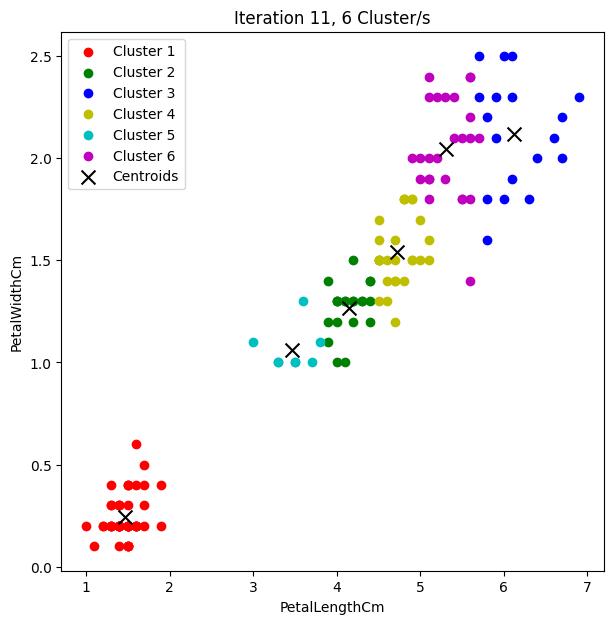

Iteration 11, 6 Cluster/s. WCSS: 11.75105243014335


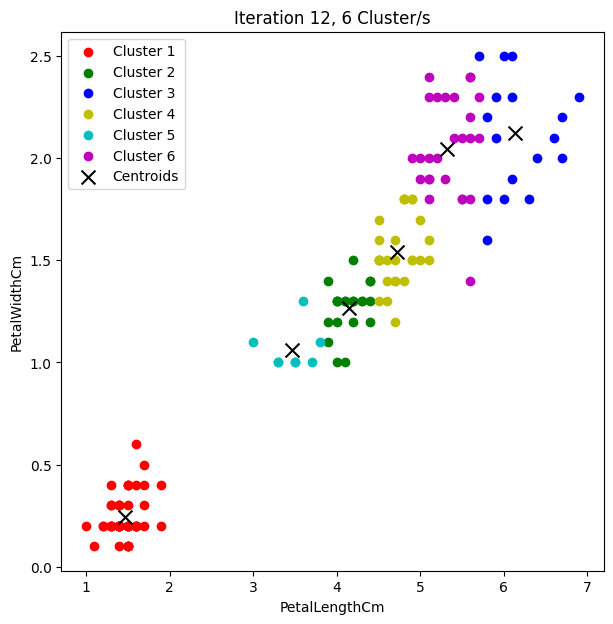

Iteration 12, 6 Cluster/s. WCSS: 11.715821446208118


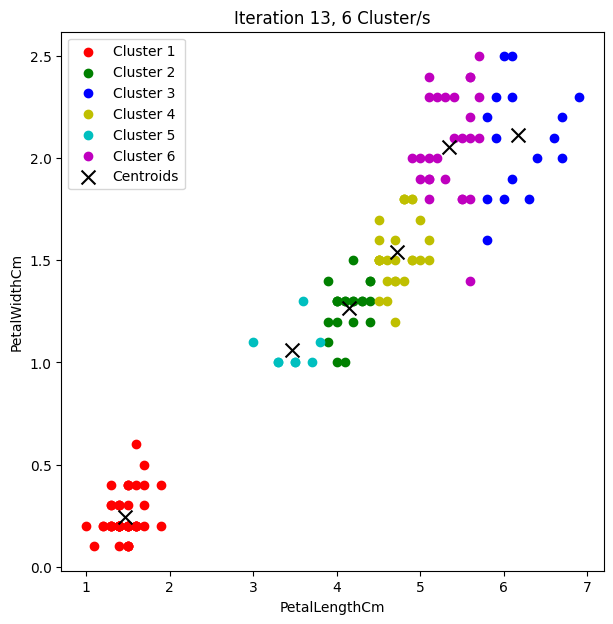

Iteration 13, 6 Cluster/s. WCSS: 11.65441949377036


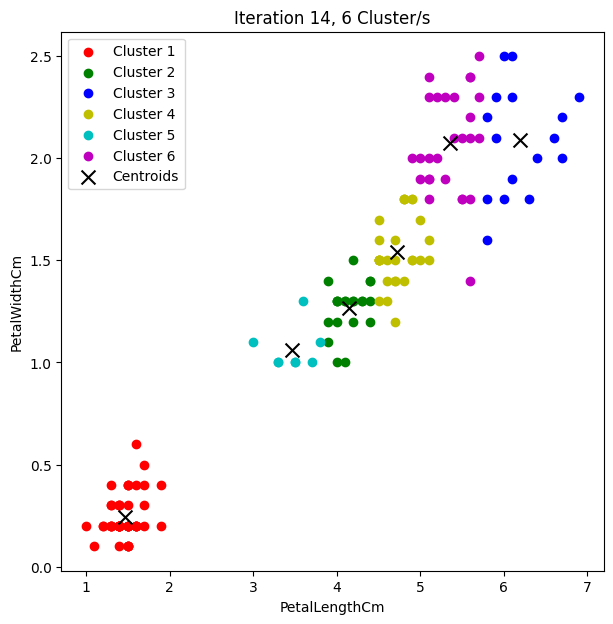

Iteration 14, 6 Cluster/s. WCSS: 11.619415211640213


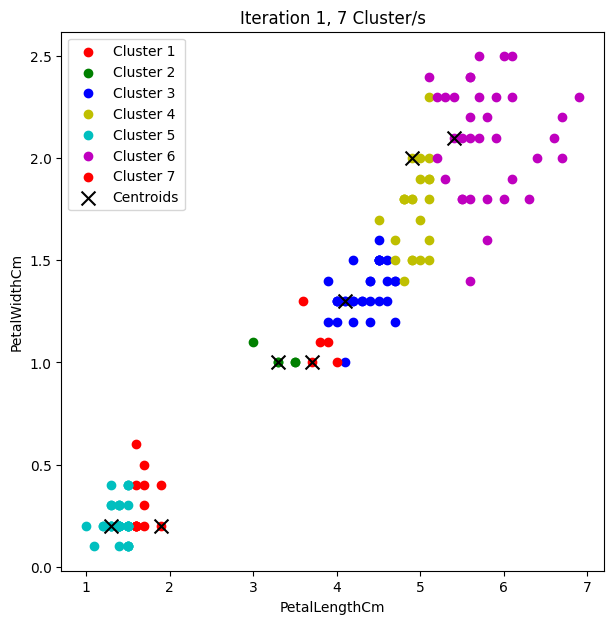

Iteration 1, 7 Cluster/s. WCSS: 25.13999999999998


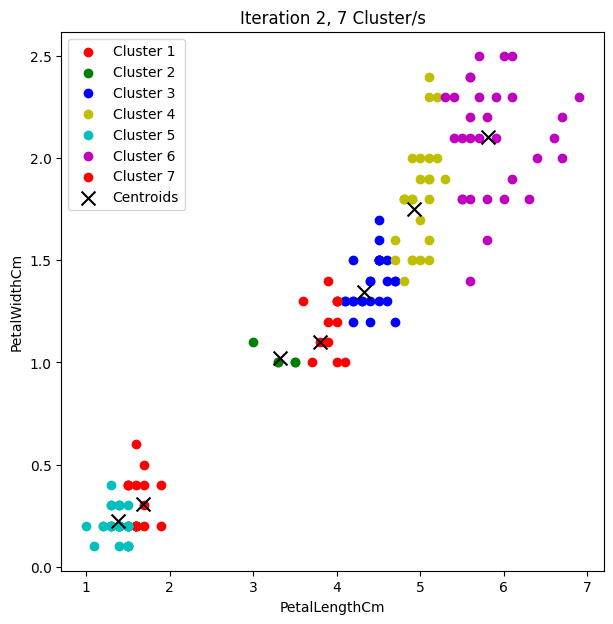

Iteration 2, 7 Cluster/s. WCSS: 13.90307036490782


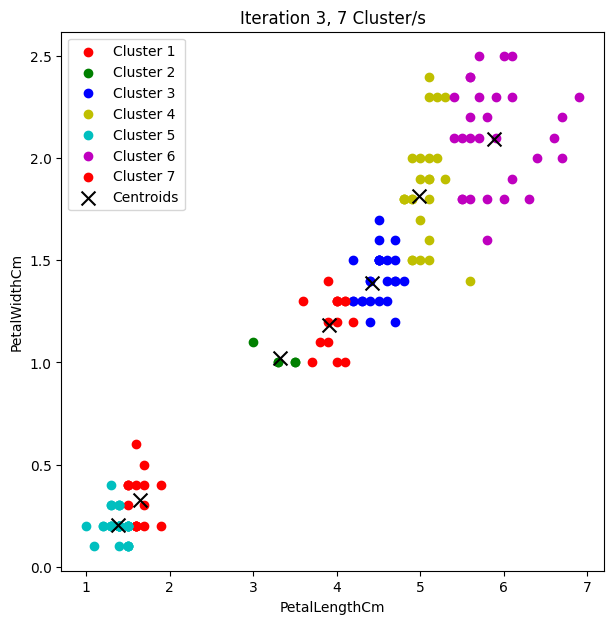

Iteration 3, 7 Cluster/s. WCSS: 12.598561511323675


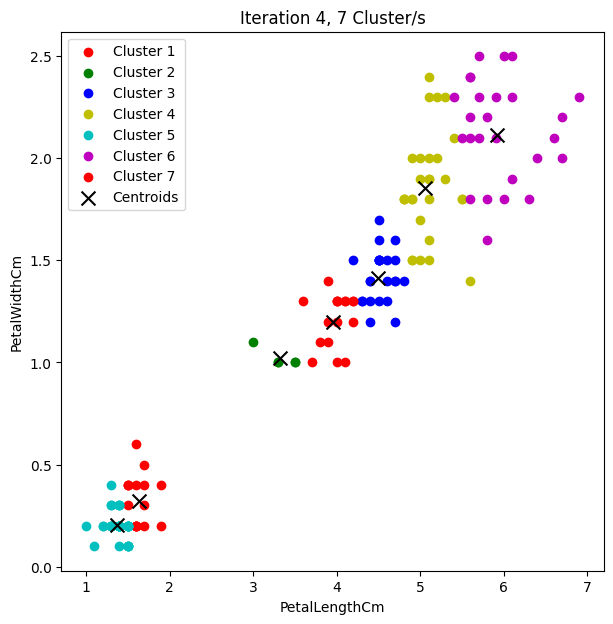

Iteration 4, 7 Cluster/s. WCSS: 11.953887361495859


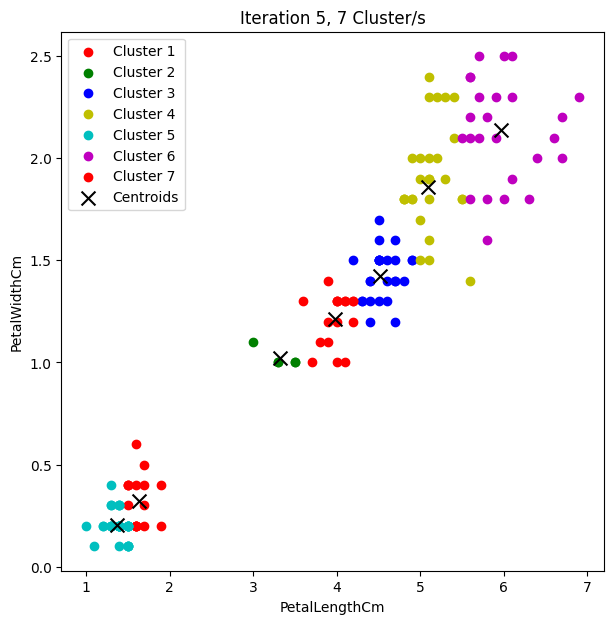

Iteration 5, 7 Cluster/s. WCSS: 11.680224132521042


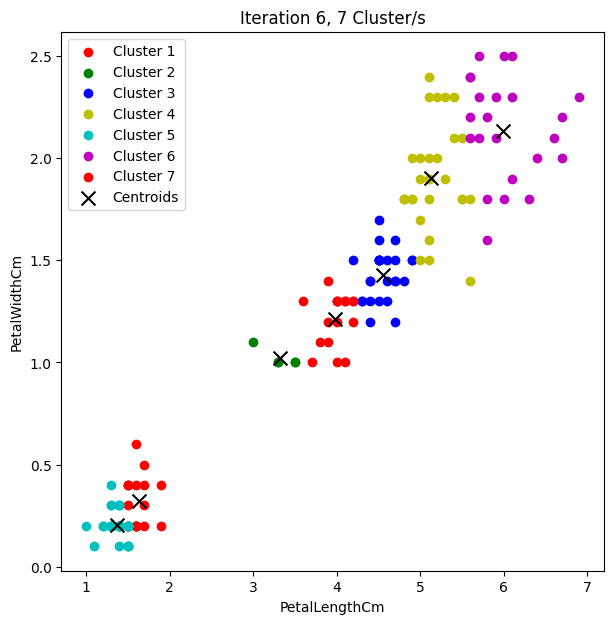

Iteration 6, 7 Cluster/s. WCSS: 11.495886996288792


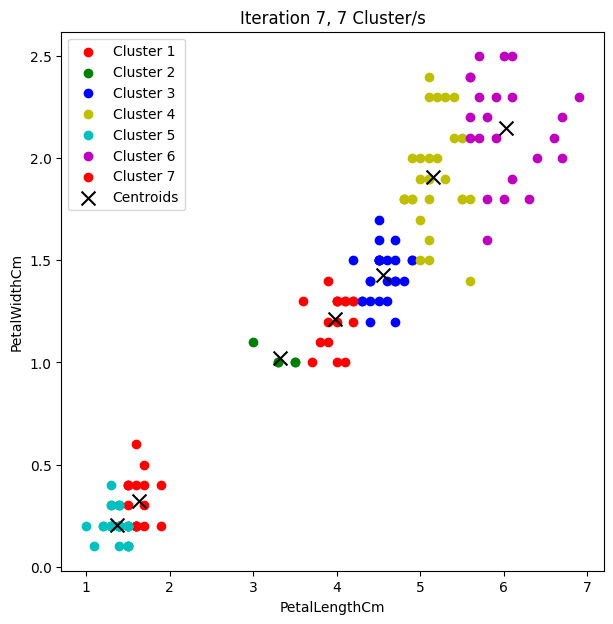

Iteration 7, 7 Cluster/s. WCSS: 11.431225964763405


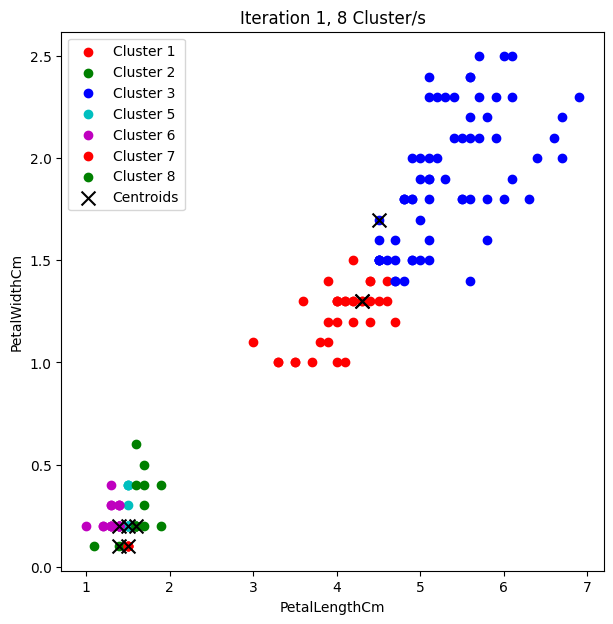

Iteration 1, 8 Cluster/s. WCSS: 90.90000000000008


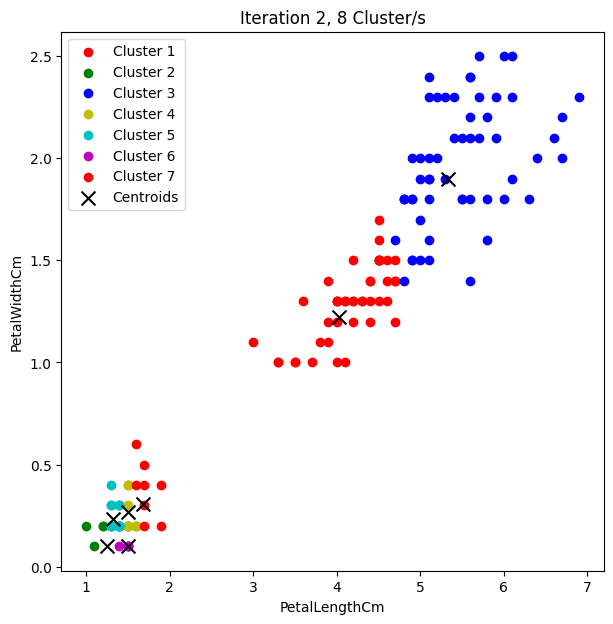

Iteration 2, 8 Cluster/s. WCSS: 34.10310144508599


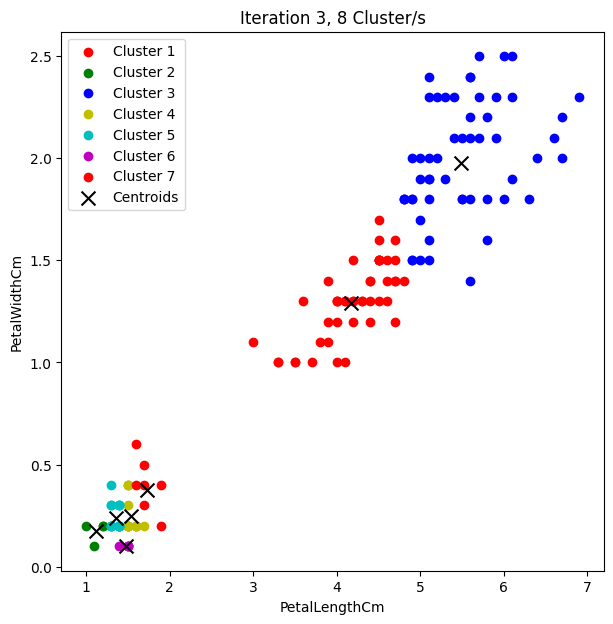

Iteration 3, 8 Cluster/s. WCSS: 30.52122755429997


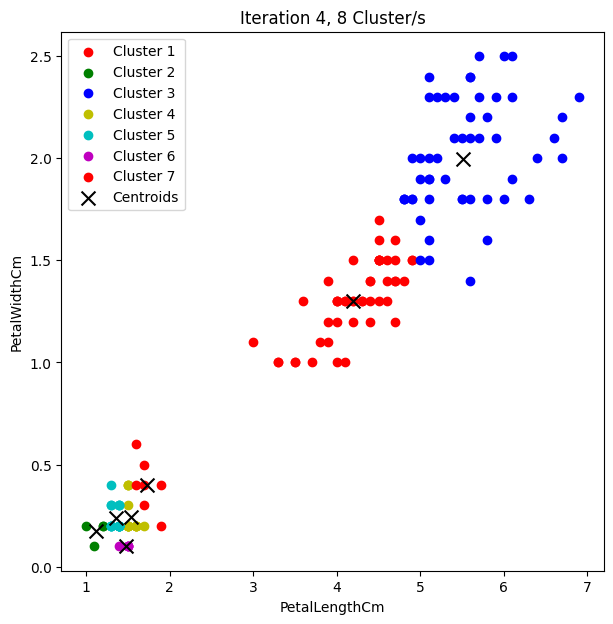

Iteration 4, 8 Cluster/s. WCSS: 30.2622013450148


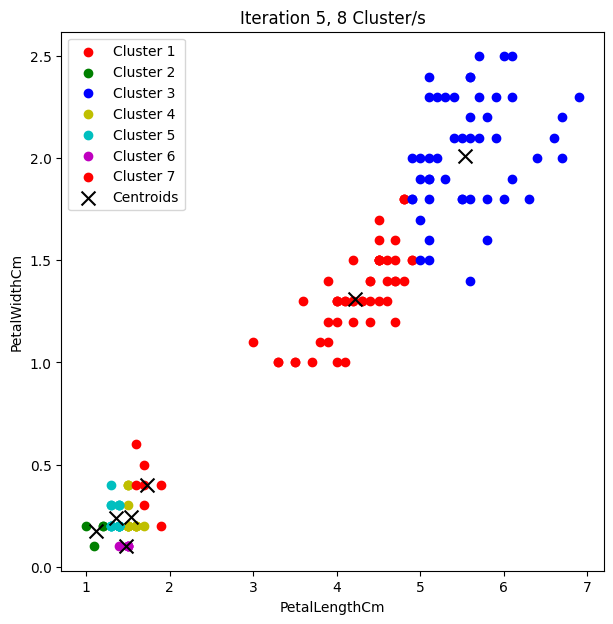

Iteration 5, 8 Cluster/s. WCSS: 30.121907236927072


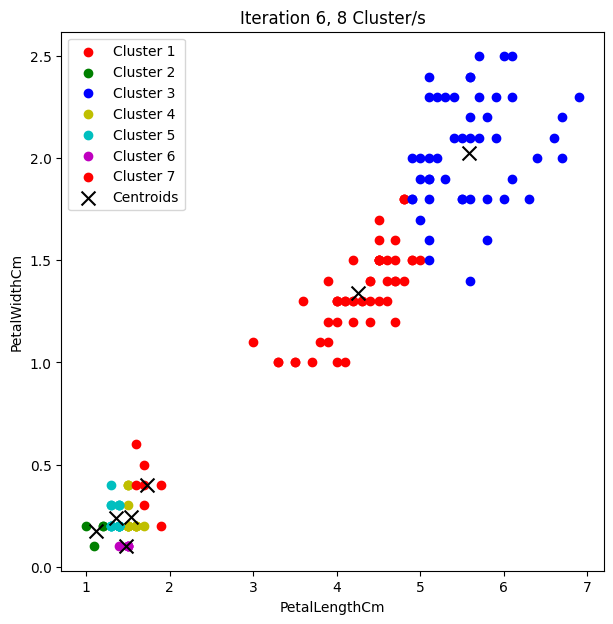

Iteration 6, 8 Cluster/s. WCSS: 29.87499686577312


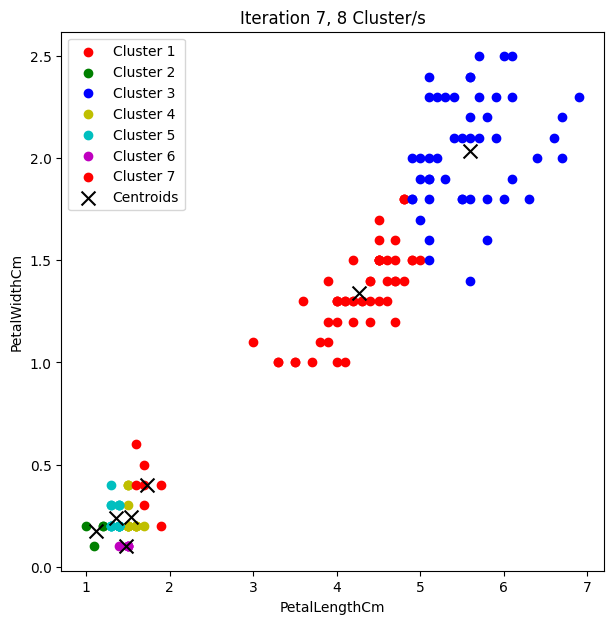

Iteration 7, 8 Cluster/s. WCSS: 29.850950244200245


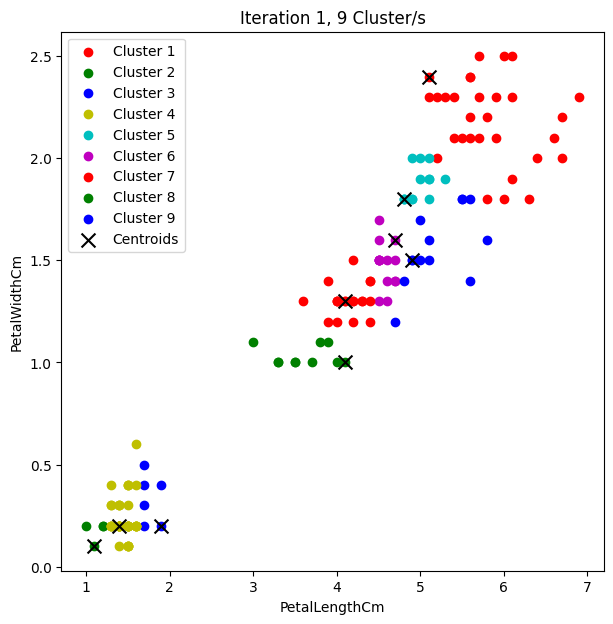

Iteration 1, 9 Cluster/s. WCSS: 36.25000000000006


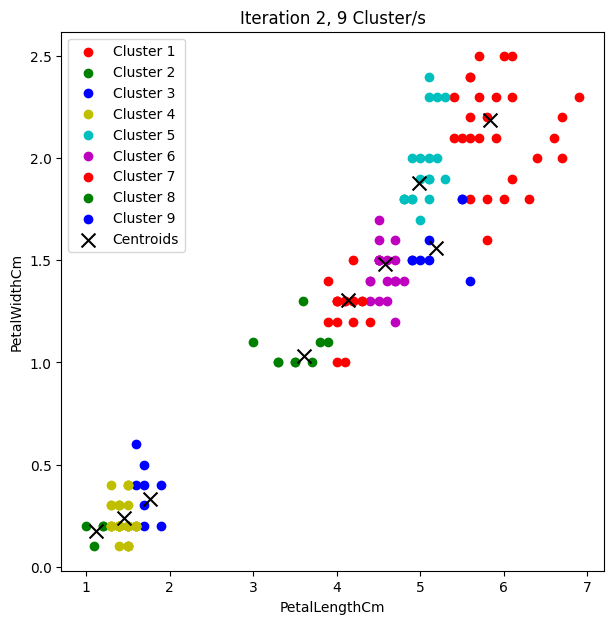

Iteration 2, 9 Cluster/s. WCSS: 11.503562541728812


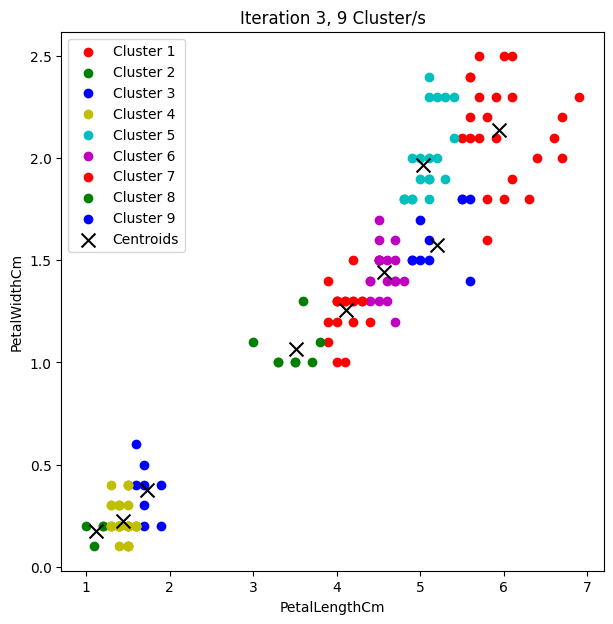

Iteration 3, 9 Cluster/s. WCSS: 10.328823923217799


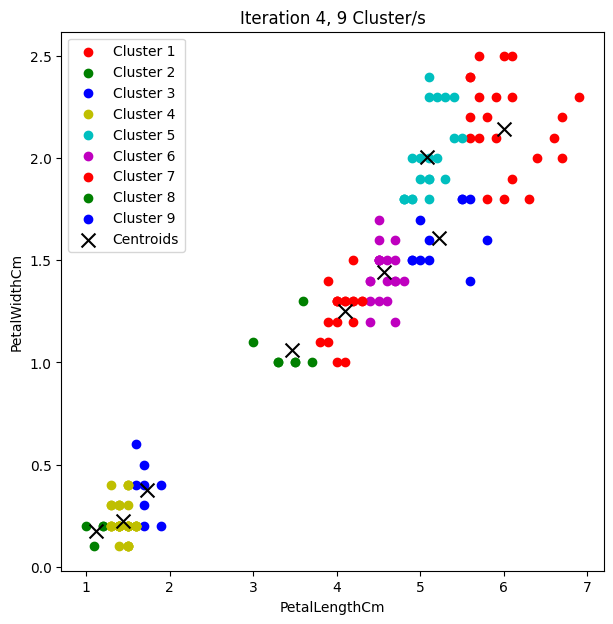

Iteration 4, 9 Cluster/s. WCSS: 10.068482967836246


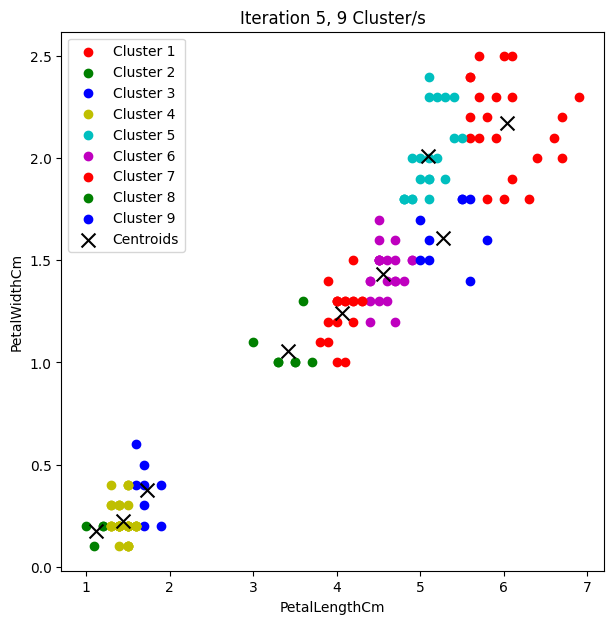

Iteration 5, 9 Cluster/s. WCSS: 9.891297177418156


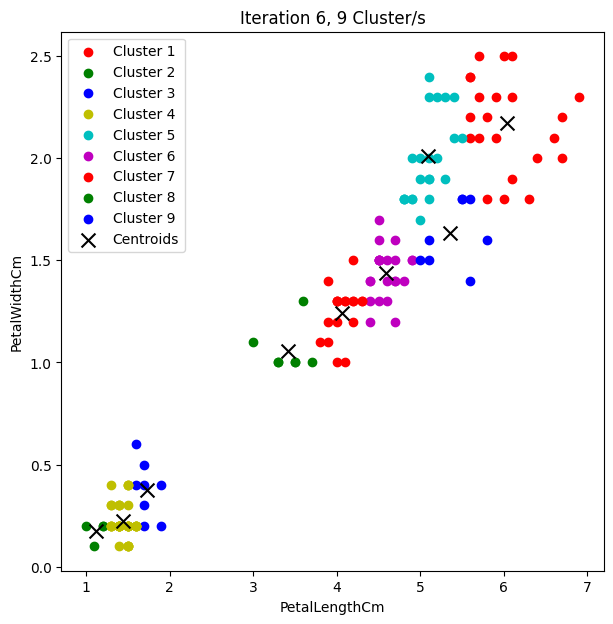

Iteration 6, 9 Cluster/s. WCSS: 9.777057684626065


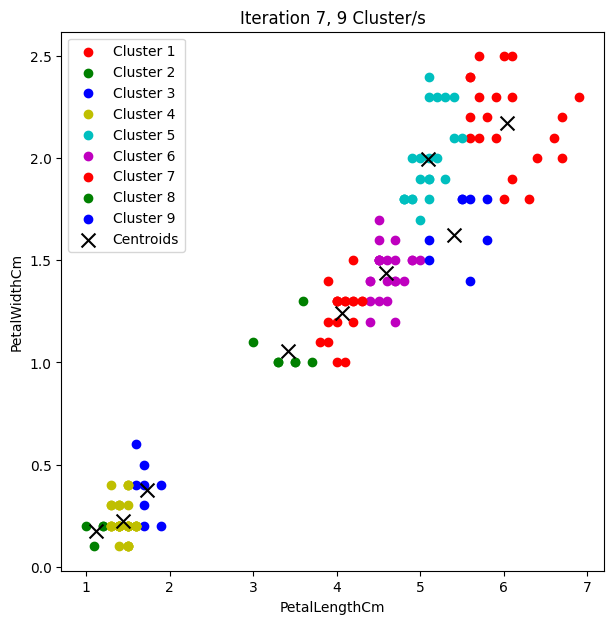

Iteration 7, 9 Cluster/s. WCSS: 9.750449232070055


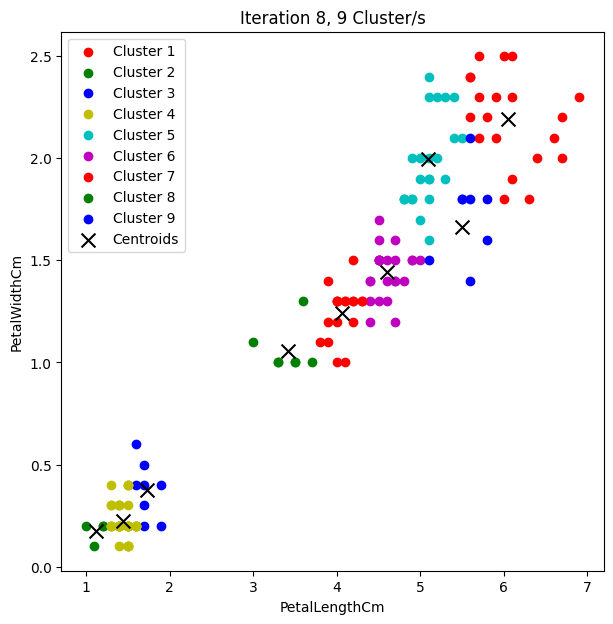

Iteration 8, 9 Cluster/s. WCSS: 9.628078628290519


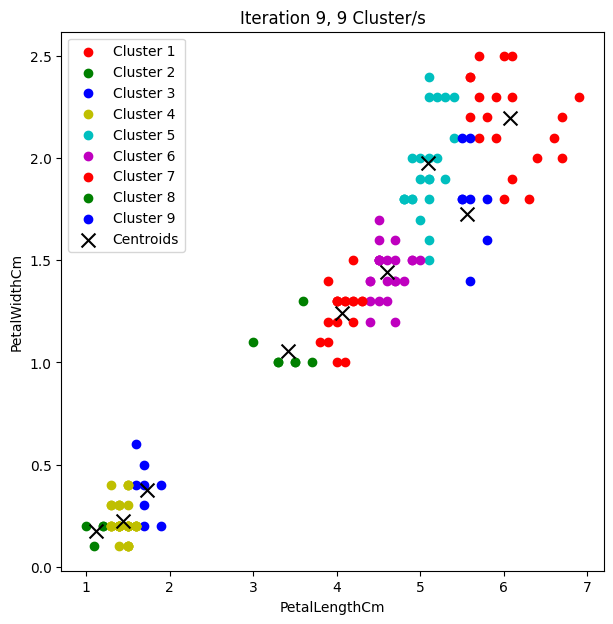

Iteration 9, 9 Cluster/s. WCSS: 9.475304801859725


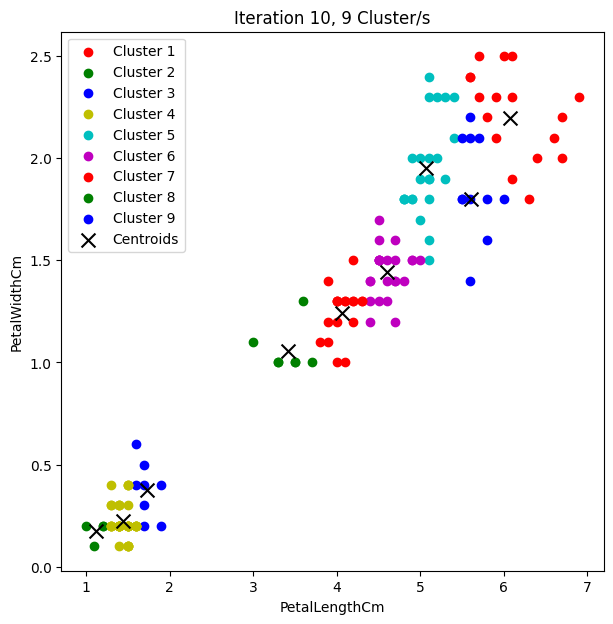

Iteration 10, 9 Cluster/s. WCSS: 9.267889856207542


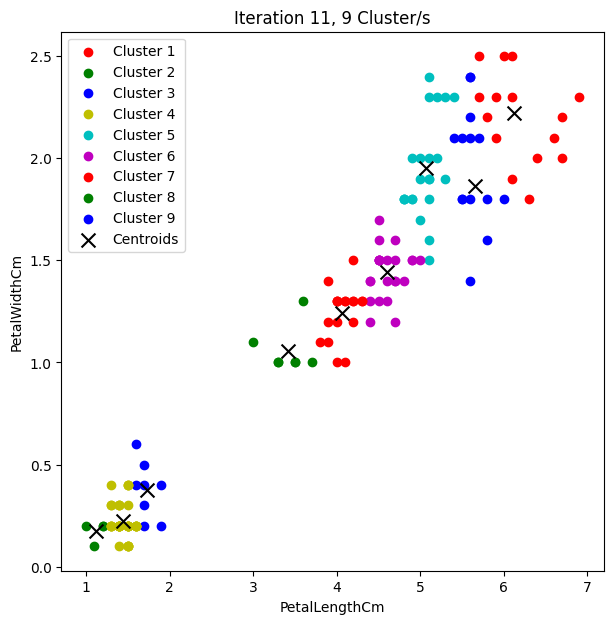

Iteration 11, 9 Cluster/s. WCSS: 9.104698238409329


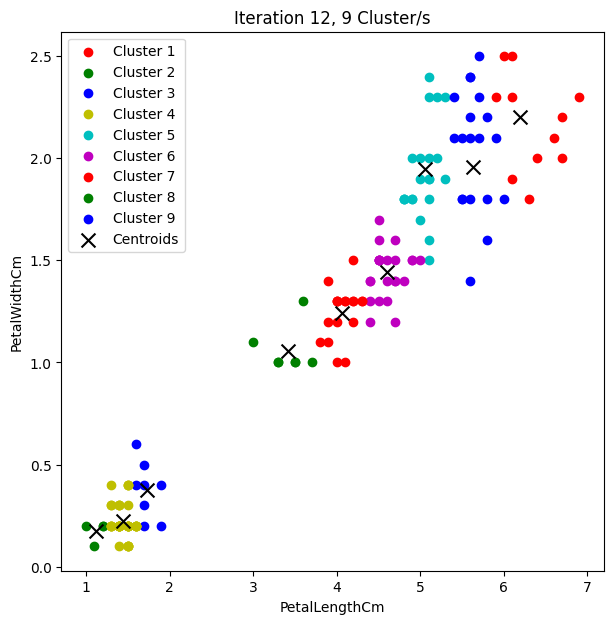

Iteration 12, 9 Cluster/s. WCSS: 8.580886003527116


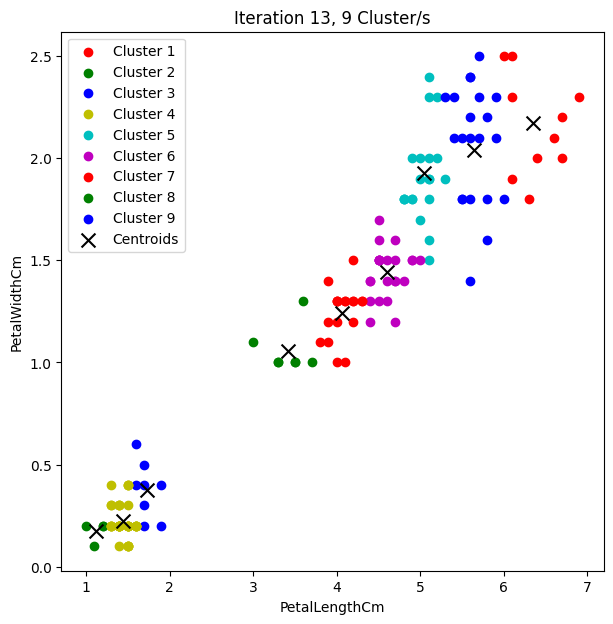

Iteration 13, 9 Cluster/s. WCSS: 8.061565003056847


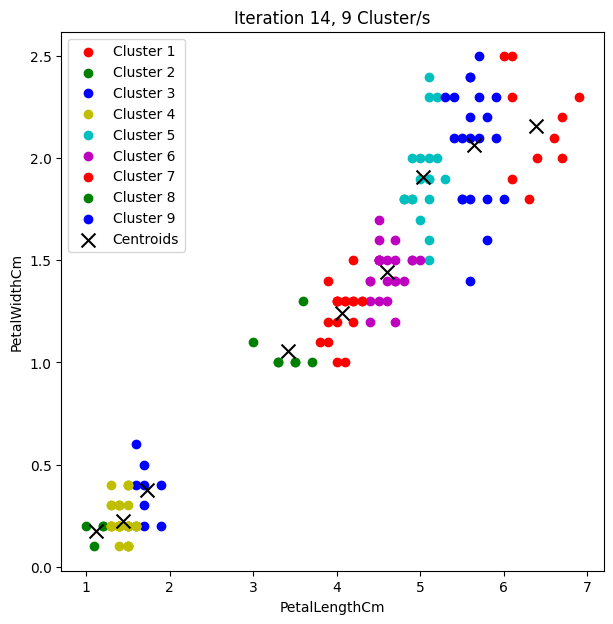

Iteration 14, 9 Cluster/s. WCSS: 8.016802213868003


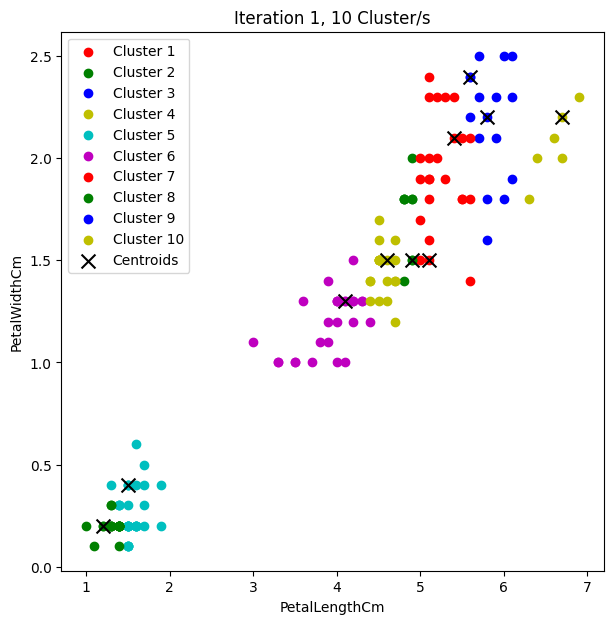

Iteration 1, 10 Cluster/s. WCSS: 12.449999999999978


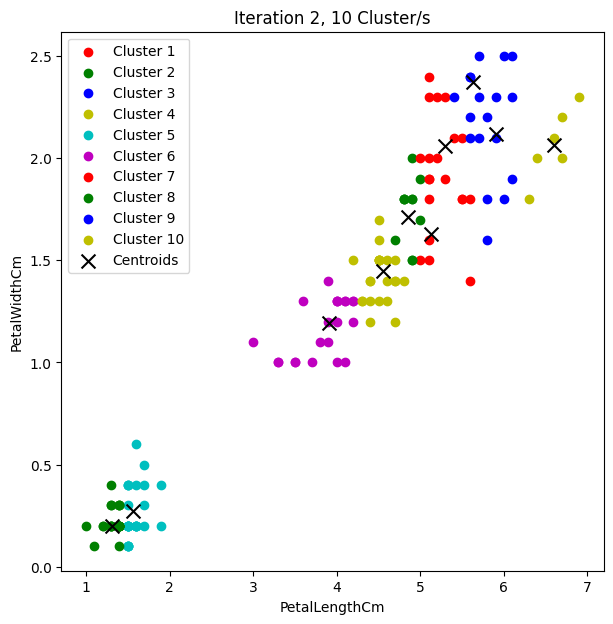

Iteration 2, 10 Cluster/s. WCSS: 8.417787587240534


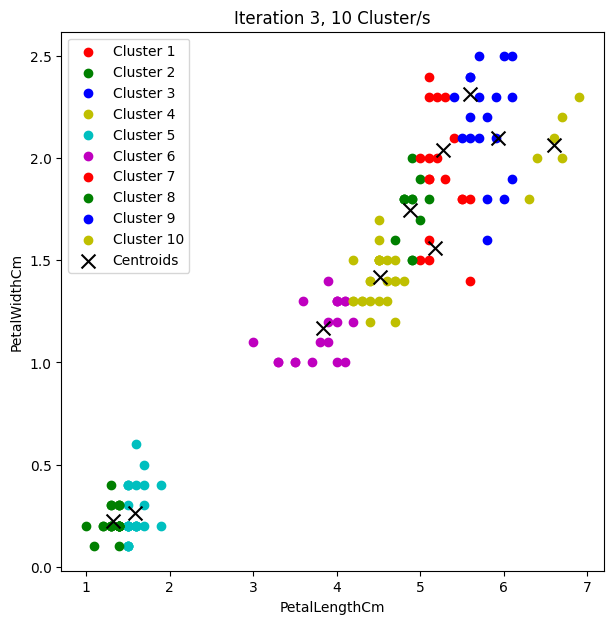

Iteration 3, 10 Cluster/s. WCSS: 7.99821820170389


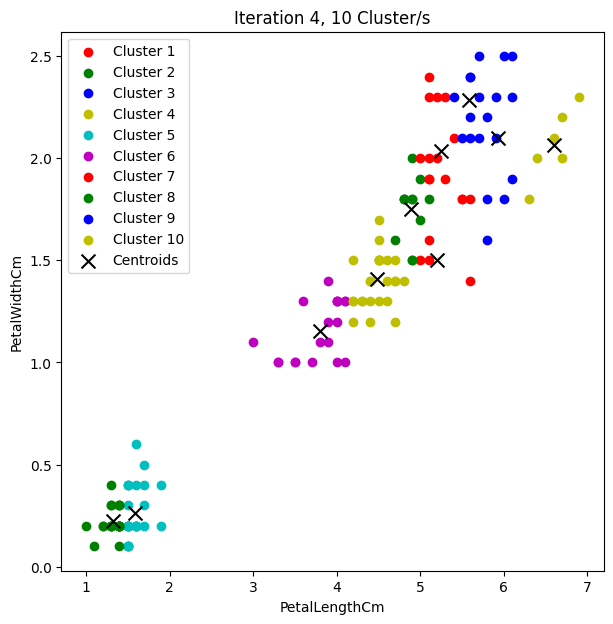

Iteration 4, 10 Cluster/s. WCSS: 7.874376553001304


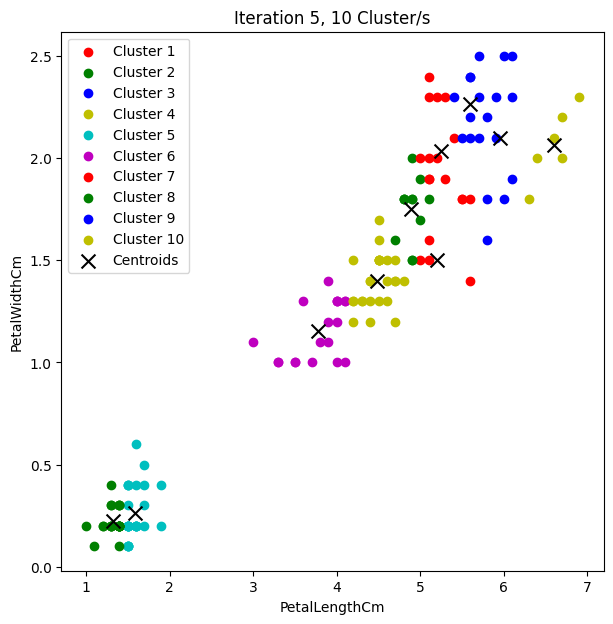

Iteration 5, 10 Cluster/s. WCSS: 7.850305136214741


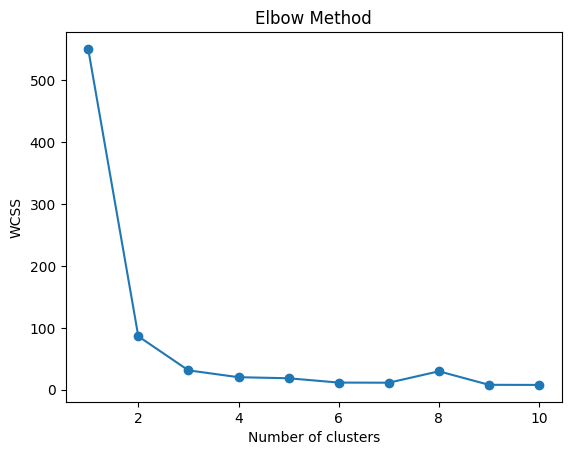


Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]

Accuracy: 0.9600
Precision: 0.9605
Recall: 0.9600
F1-score: 0.9600


(array([[50,  0,  0],
        [ 0, 48,  2],
        [ 0,  4, 46]]),
 0.96,
 0.9604700854700855,
 0.96,
 0.9599839935974391)

In [ ]:
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

